# ЛАБОРАТОРНАЯ РАБОТА №1
## НАЗАРОВ РУСТАМ М3132 368563

## АНАЛИТИЧЕСКАЯ ЧАСТЬ

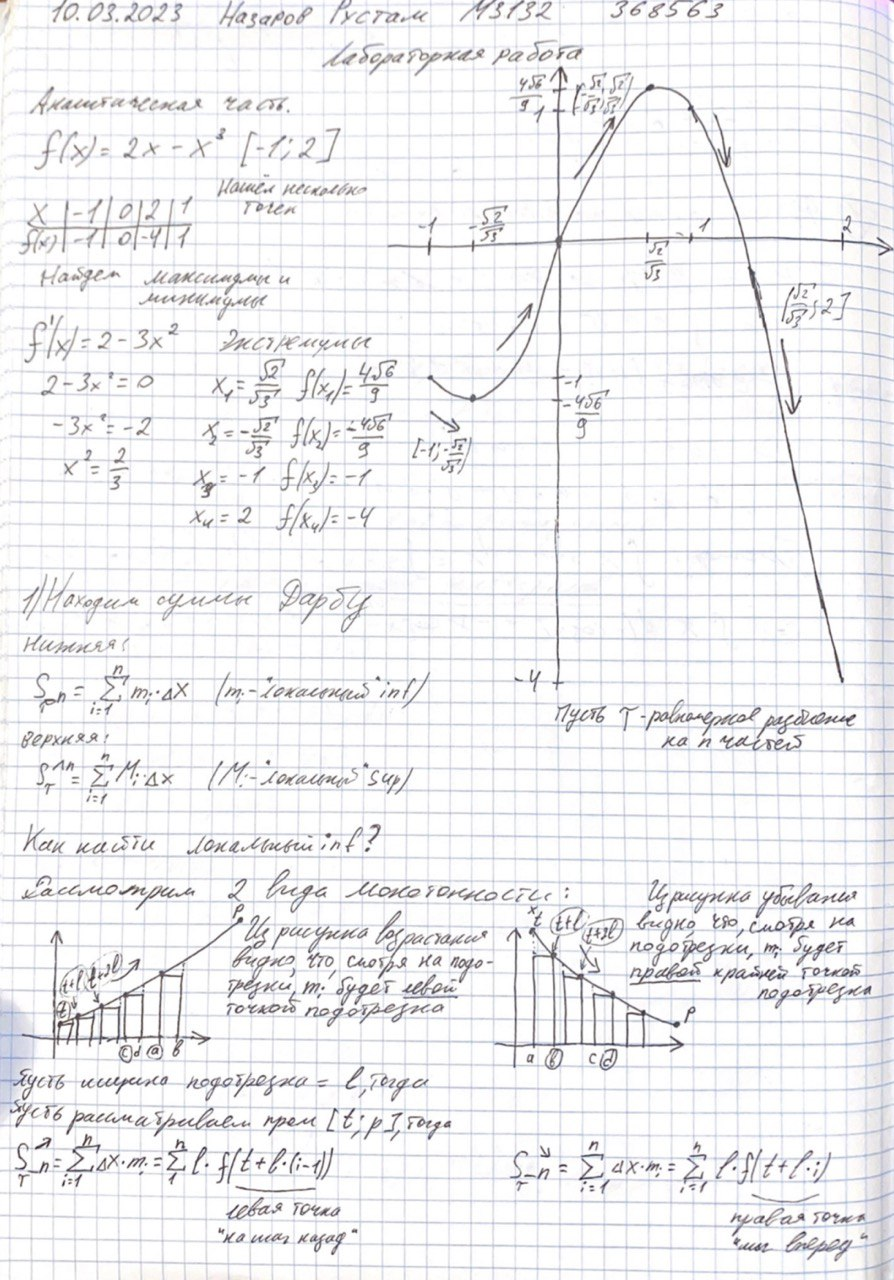

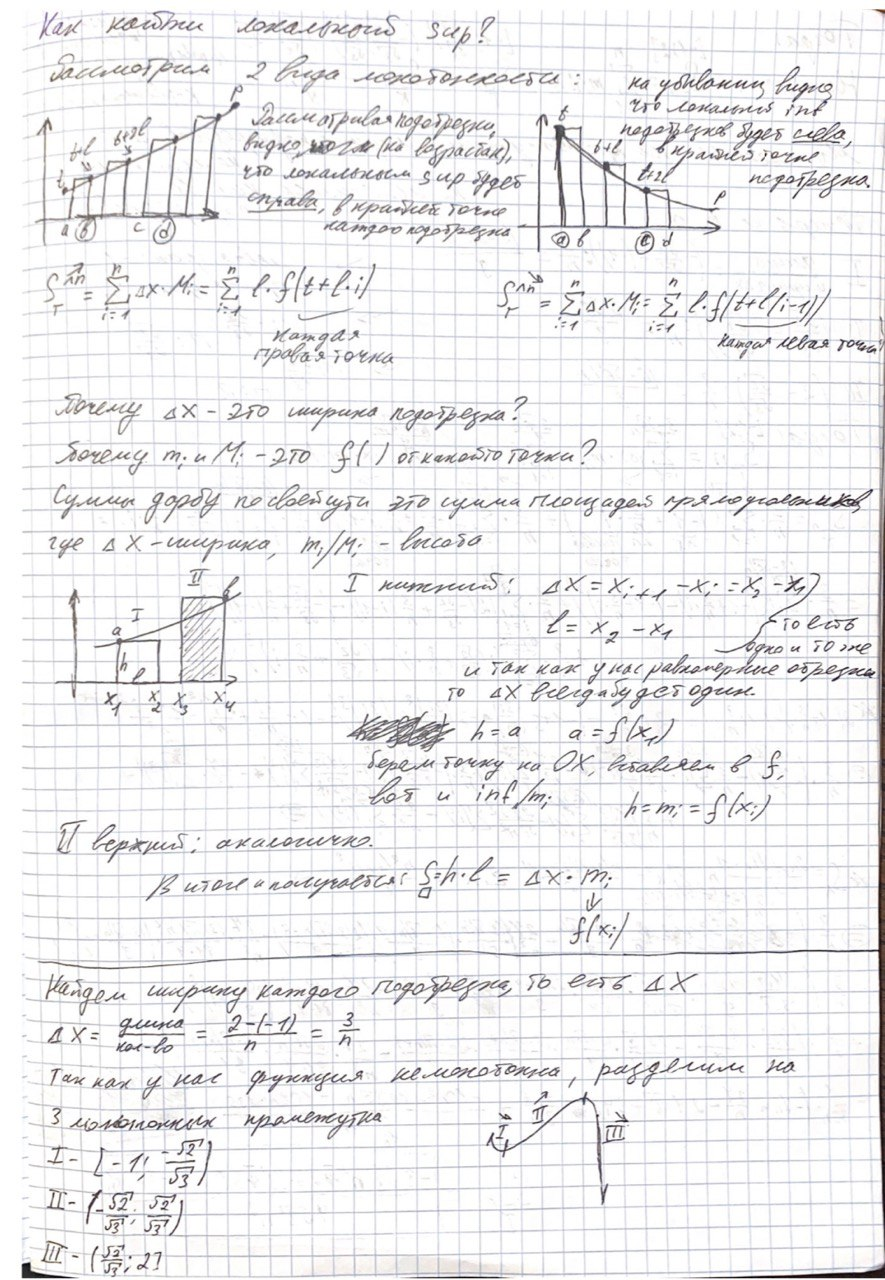

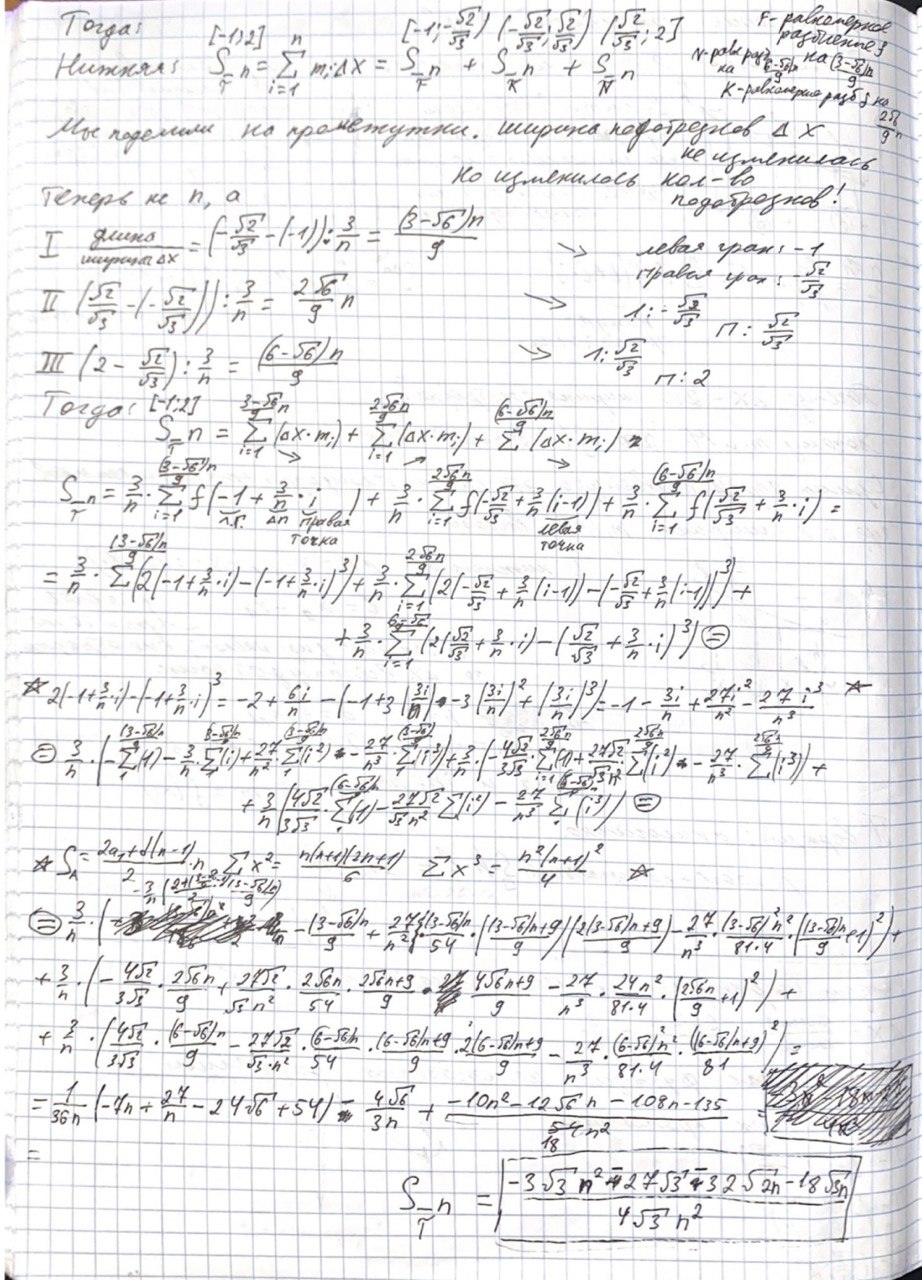

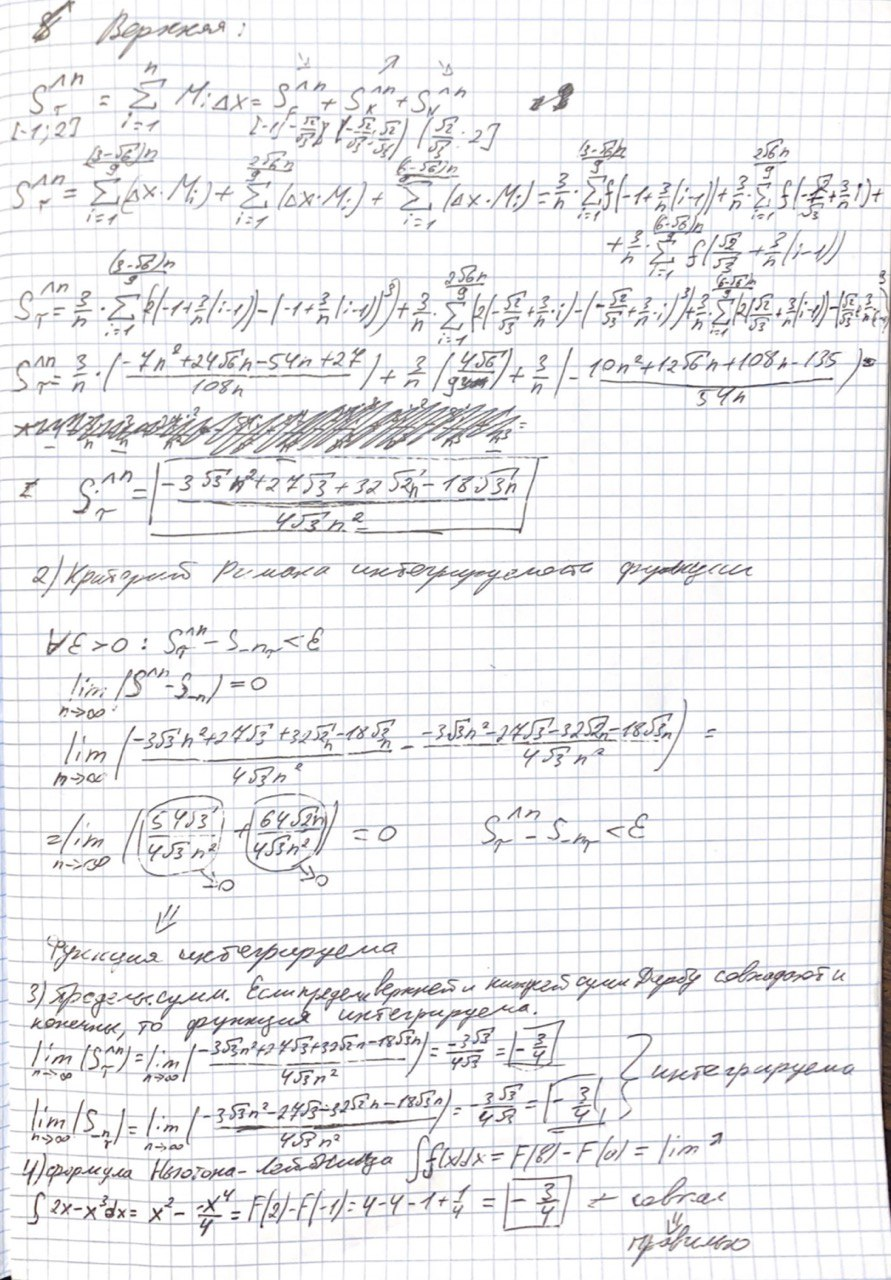

## ПОЛУЧЕННЫЕ КЛЮЧЕВЫЕ ЗНАЧЕНИЯ

### 1) СУММЫ ДАРБУ

Верхняя сумма

$$S^n= \frac{-3\sqrt{3}n^2+27\sqrt{3}+32\sqrt{2}n-18\sqrt{3}n}{4\sqrt{3}n^2}$$

Нижняя сумма

$$S_n= \frac{-3\sqrt{3}n^2-27\sqrt{3}-32\sqrt{2}n-18\sqrt{3}n}{4\sqrt{3}n^2}$$

### 2) КРИТЕРИЙ РИМАНА

$$\lim\limits_{n\to\infty}{S^n-S_n} = 0$$

### 3) ПРЕДЕЛЫ СУММ

$$\lim\limits_{n\to\infty}{S^n} = -\frac{3}{4} = -0.750$$

$$\lim\limits_{n\to\infty}{S_n} = -\frac{3}{4} = -0.750$$

### 4) ФОРМУЛА НЬЮТОНА-ЛЕЙБНИЦА

$$\int_{-1}^{2} {f(x)} \,dx = \int_{-1}^{2} {2x-x^3}\,dx = x^2-\frac{x^4}{4}=F(2)-F(-1)=4-4-1+\frac{1}{4}=-\frac{3}{4}=-0.750$$

## ЧИСЛЕННЫЙ МЕТОД

**PYTHON 3.11**

In [3]:
# Импортируем необходимые пакеты
from random import uniform # Рандом
from texttable import Texttable # Табоица в виде текста
import numpy as np # Вычисления для графиков
import matplotlib.pyplot as plt # Графики
import math # Математика
import matplotlib.patches as patches # Прямоугольники
%matplotlib inline

In [4]:
# Библиотека, по одному индексу из каждого берется информация о текущем рисунке
colors = ['green', 'red', 'orange', 'orange', 'orange', 'orange'] # Библиотека цветов
dots = ['ro', 'go', 'bo', 'bo', 'bo', 'bo'] # Библиотека точек
name = ['Upper sum', 'Lower sum', 'left', 'right', 'center', 'random'] # Библиотека имен

## 1) Вычисление интегральных сумм с параметрами f(x) [a;b] n разбиениями и оснащением

**+**

## 2) Визуализация 

In [5]:
# Произвольная функция, можно заменить
def function(x):
    return 2 * x - x ** 3

In [6]:
# Данные для функции
start = -1 # левая граница
end = 2 # правая граница
number = 20 # число разбиений 
kind = 'left' # оснащение

In [7]:
# Функция вычисления интегральных сумм по заданному промежутку, 
# заданной функциии, заданному разбиения и заданному оснащения
def darbu_sums_methods(f, a, b, n, method='left', draw_funct=True, draw=True):
    ind = name.index(method) # индекс в библиотеках
    # вычисляем ширину каждого подынтервала
    delta_x = (b - a) / n
    # инициализируем сумму
    sum = 0
    sum_x = [0] * n # массив точек по ОХ суммы
    square_x = [0] * n # массиов х'ов для секторов (прямоугольников)
    sum_y = [0] * n # массив точек по ОУ суммы и прямоугольников, 
    # так по высоте растягиваем до точки
    # проходим по каждому подынтервалу
    for i in range(n):
        # выбираем точку на подынтервале в соответствии с заданным оснащением
        if method == 'left':
            x = a + i * delta_x # Так как начали с 0, нет (i - 1) просто i
            square_x[i] = x # Левая точка и есть начало сектора
        elif method == 'right':
            x = a + (i + 1) * delta_x # Правая точка суммы
            square_x[i] = x - delta_x # Левая является началом сектора, поэтому уменьшаем
        elif method == 'center':
            x = a + i * delta_x + delta_x / 2 # Центральная точка
            square_x[i] = x - delta_x / 2 # Уменьшаем на половину, начало сектора слева
        elif method == 'random':
            x = uniform(a + i * delta_x, a + (i + 1) * delta_x) # Рандов от левой до правой
            square_x[i] = a + i * delta_x # Взяли вычисление левой из левого случая
        else:
            raise ValueError('Invalid method')
        # вычисляем значение функции в выбранной точке
        sum += f(x)
        # Берем точки суммы
        sum_x[i] = x 
        sum_y[i] = f(x)
    # Умножаем на дельтту, получаем площадь прямоугольника с высотой f_x и шириной дельта
    sum *= delta_x
    # Если надо вывести функцию, выводим
    if (draw_funct):
        draw_func(a, b, f)
    if (draw):
        # Выводим полученную сумму
        draw_sum(a, b, f, sum_x, square_x, sum_y, delta_x, ind)
        print(name[ind], sum)
    return sum

In [8]:
# Метод по рисованию данной функции
def draw_func(a, b, f):
    # диапозон
    x = np.arange(a, b + 0.1, 0.1)
    f_x = f(x) # Значения по ОУ

    fig = plt.figure(figsize=(12,10))   # Размер графика
    # Цвет окантовки
    fig.patch.set_facecolor('#DDA0DD')

    # Заголовок
    ax = fig.add_subplot()
    fig.subplots_adjust(top=0.93)
    fig.suptitle(f'Данная функция f(x) [{a};{b}]', fontsize=15, fontweight='bold')

    # Размер координат осей абсцисс и ординат
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

    # Разметка на графике
    plt.grid(axis = 'both', linewidth = 0.4)

    # Выводим график функции
    plt.plot(x, f_x, color='#000080', linewidth=6, label='Функция')
    
    # Двигаем Оси ОХ ОУ до привычных
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Выведем Легенду
    plt.legend(loc=3, prop={'size': 20})

    # Вывод полученного графика
    plt.show()

In [9]:
# Метод по рисованию суммы
def draw_sum(a, b, f, sum_x, square_x, sum_y, delta_x, ind):
    x = np.arange(a, b + 0.1, 0.1) # диапозон по ОХ
    f_x = f(x) # Диапозон по ОУ

    fig = plt.figure(figsize=(12,10))   # Размер графика
    # Цвет окантовки
    fig.patch.set_facecolor('#DDA0DD')

    # Заголовок
    ax = fig.add_subplot()
    fig.subplots_adjust(top=0.93)
    fig.suptitle(f'{name[ind]} sum разбиение: {len(square_x)}', fontsize=15, fontweight='bold')

    # Размер координат осей абсцисс и ординат
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

    # Разметка на графике
    plt.grid(axis = 'both', linewidth = 0.4)

    # Выводим график функции
    plt.plot(x, f_x, color='#000080', linewidth=6, label='Функция')
    # Выводим точки суммы
    plt.plot(sum_x, sum_y, dots[ind], markersize=10, label=name[ind])
    
    # Секторы (прямоугольники)
    for i in range(len(sum_x)):
        ax.add_patch(
        patches.Rectangle(
            (square_x[i], 0),
            delta_x,
            sum_y[i],
            edgecolor = 'blue',
            facecolor = colors[ind],
            fill=True
         ) )
    
    # Оси в центр
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Выведем Легенду
    plt.legend(loc=3, prop={'size': 20})

    # Вывод полученного графика
    plt.show()

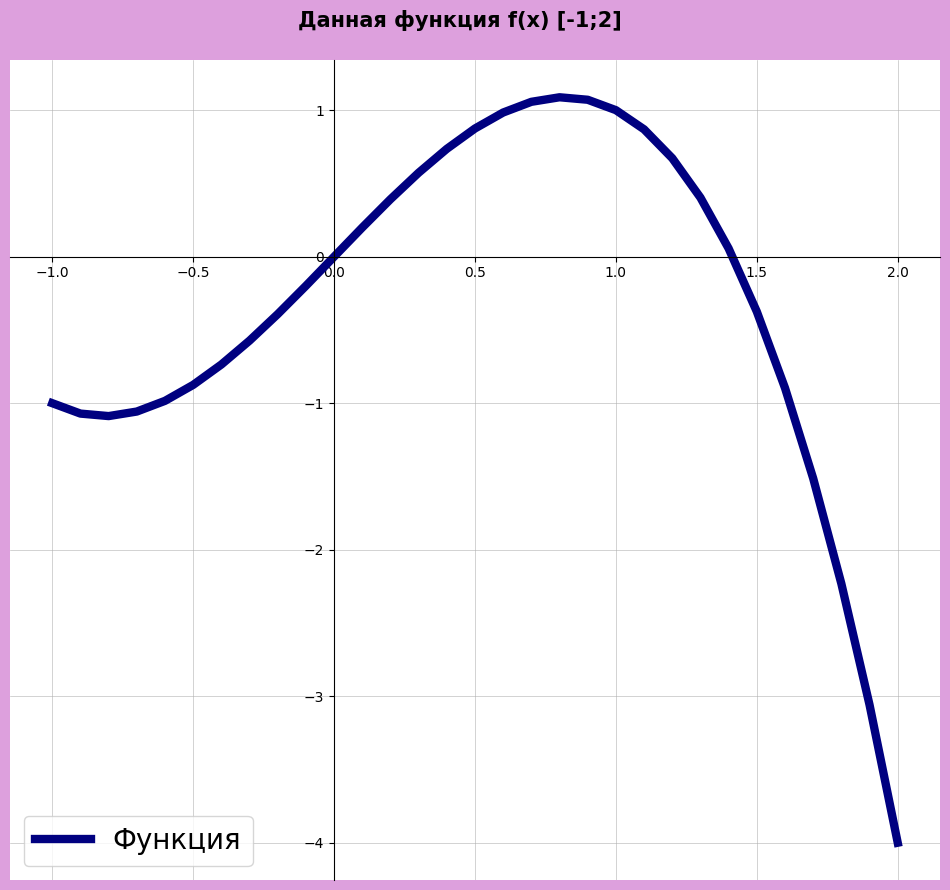

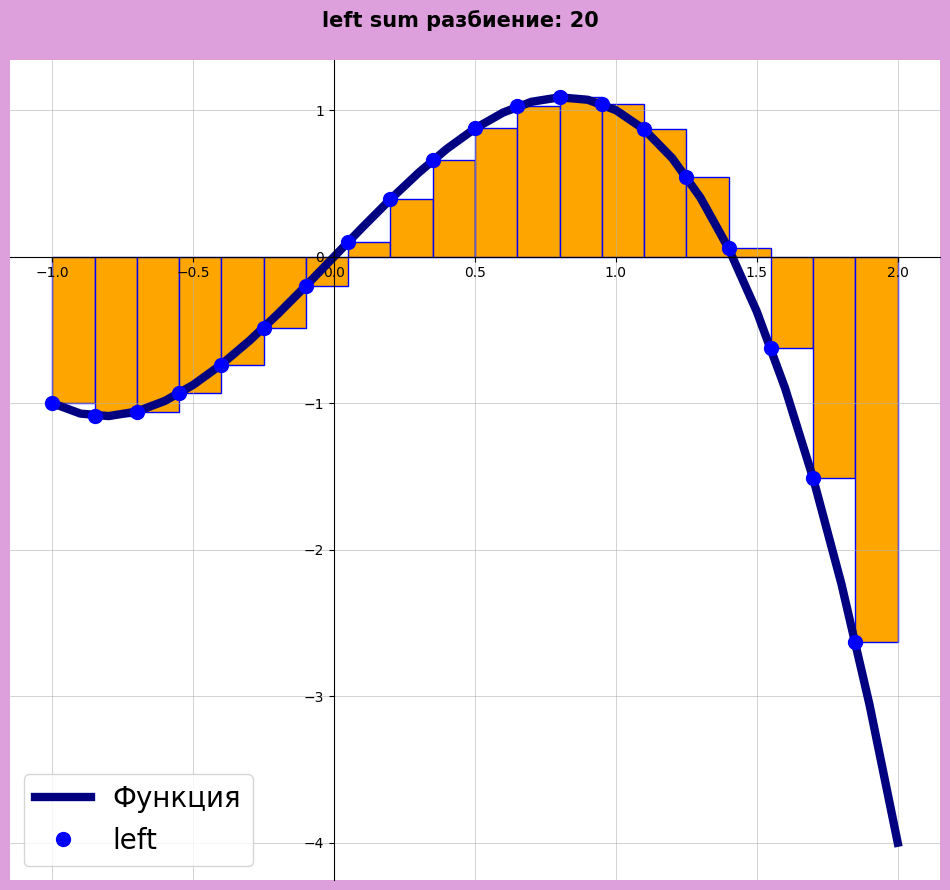

left -0.5418749999999996


-0.5418749999999996

In [10]:
# Выводим заданную произовльную функцию с заданными параметрами
darbu_sums_methods(function, start, end, number, kind)

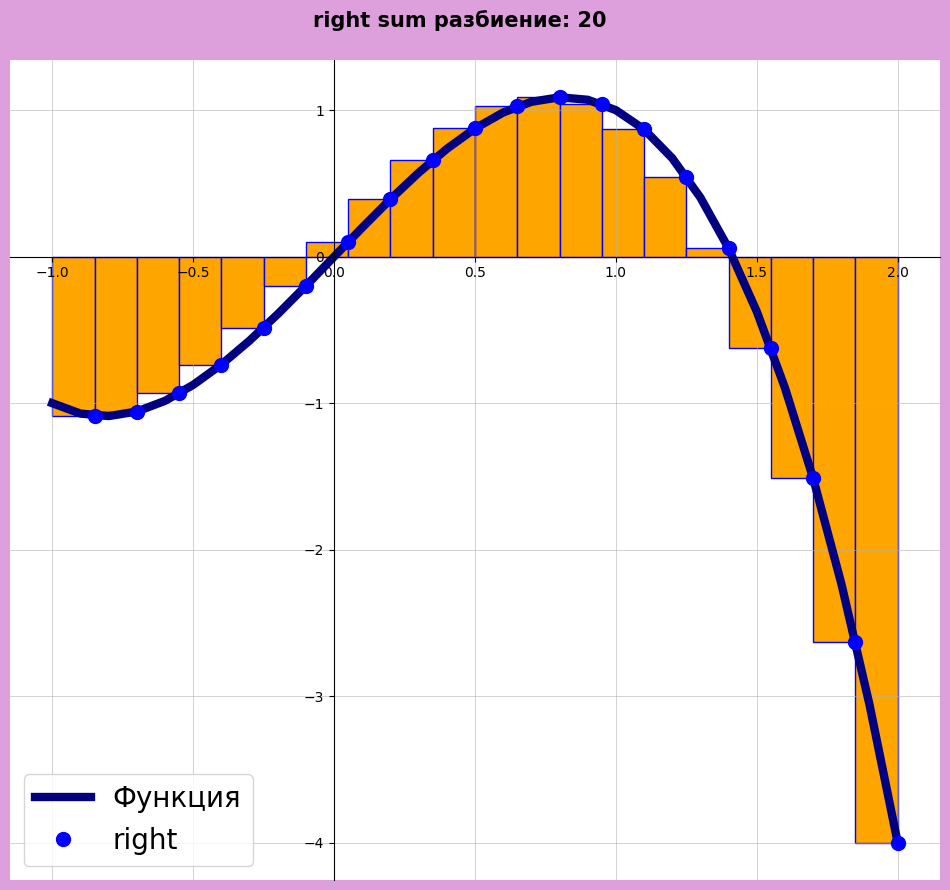

right -0.9918749999999995


-0.9918749999999995

In [11]:
# Так как по умолчанию в коде left, Вывожу и остальные оснащения с заданными параметрами
# Правое оснащение
kind = 'right'
darbu_sums_methods(function, start, end, number, kind, False)

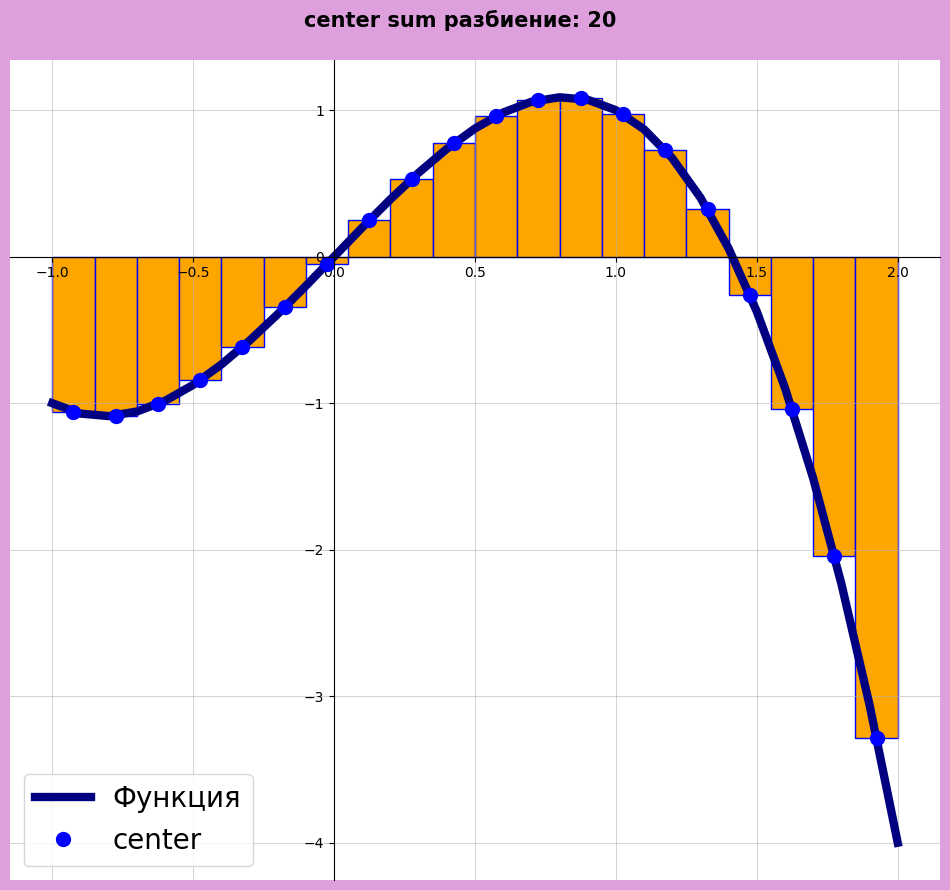

center -0.7415624999999996


-0.7415624999999996

In [12]:
# Центральное оснащение
kind = 'center'
darbu_sums_methods(function, start, end, number, kind, False)

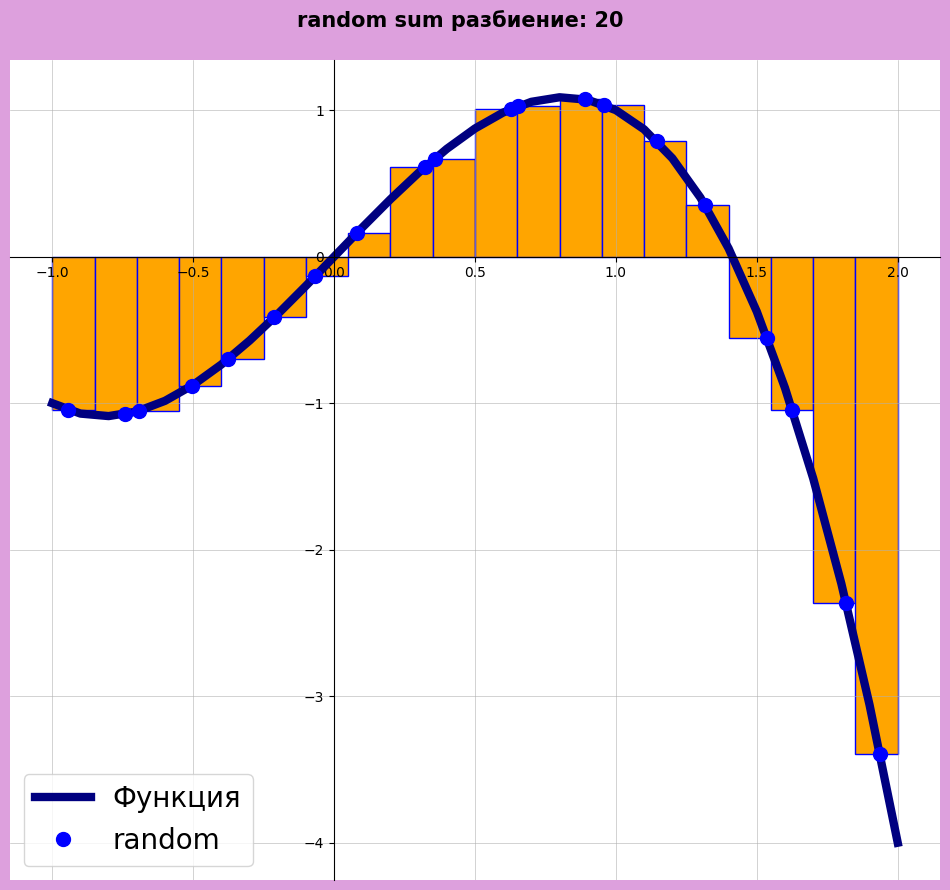

random -0.8897955238718195


-0.8897955238718195

In [13]:
# Рандомное оснащение
kind = 'random'
darbu_sums_methods(function, start, end, number, kind, False)

## 3) Сравнение результатов своей функции

In [14]:
# Цикл с шагом float
def frange(a, b, jump):
    while a <= b:
        yield a
        a += jump

In [15]:
# Моя функция
def my_function(x):
    return 2 * x - x ** 3

In [16]:
# Вычисление верхней и нижней сумм Дарбу, 
# чтобы проверить правильность выбора точек в аналитическом,
# по всему подотрезку выбираю реальный локальный inf/sup
def darbu_sums_correct(f, a, b, n, draw_funct=True, draw=True):
    # Дельта, ширита подотрезка
    delta_x = (b - a) / n
    # все крайние точки одотрезков
    x_values = [a + i * delta_x for i in range(n + 1)]
    # Инициализация сумм
    up_sum = 0
    low_sum = 0
    # Точки для секторов и сум
    square_x = [0] * n
    sup_values_x = [0] * n
    inf_values_x = [0] * n
    sup_values_y = [0] * n
    inf_values_y = [0] * n
    
    # Циклом бежим по всем точкам
    for i in range(n):
        # берем две точки, это и следующую
        x_0 = x_values[i]
        x_1 = x_values[i + 1]
        # Диапозон точек [x0;x1] с шагом длина подотрезкаа / 100
        arr_x = [x for x in frange(x_0, x_1, delta_x / 100)]
        # По этим точкам высчитываем точки на OY
        arr_y = [f(x) for x in arr_x]
        # Максимум из точек
        sup = max(arr_y)
        # Минимум из точек
        inf = min(arr_y)
        # Прибавляем к суммам
        up_sum += sup
        low_sum += inf
        
        # Берем точку для прямоугольника
        square_x[i] = x_0
        # Берем точки для рисунка сумм
        sup_values_x[i] = arr_x[arr_y.index(sup)]
        sup_values_y[i] = sup
        inf_values_x[i] = arr_x[arr_y.index(inf)]
        inf_values_y[i] = inf
    # Домножаем на дельту, получаем сумму площадей каждого прямоугольника
    up_sum *= delta_x
    low_sum *= delta_x
    # Если надо то выводим функцию
    if (draw_funct):
        draw_func(a, b, f)
    if (draw):
        # Выводим полученные суммы
        draw_sum(a, b, f, sup_values_x, square_x, sup_values_y, delta_x, 0)
        draw_sum(a, b, f, inf_values_x, square_x, inf_values_y, delta_x, 1)
        print('Upper sum: ', up_sum)
        print('Lower sum: ', low_sum)
    return (up_sum, low_sum)

Тут мы видим, что в аналитечской части правильно разбили на промежутки и правильно выбрали точки, они и правда явлются крайними и слева, там где было слева, справа, где было справа

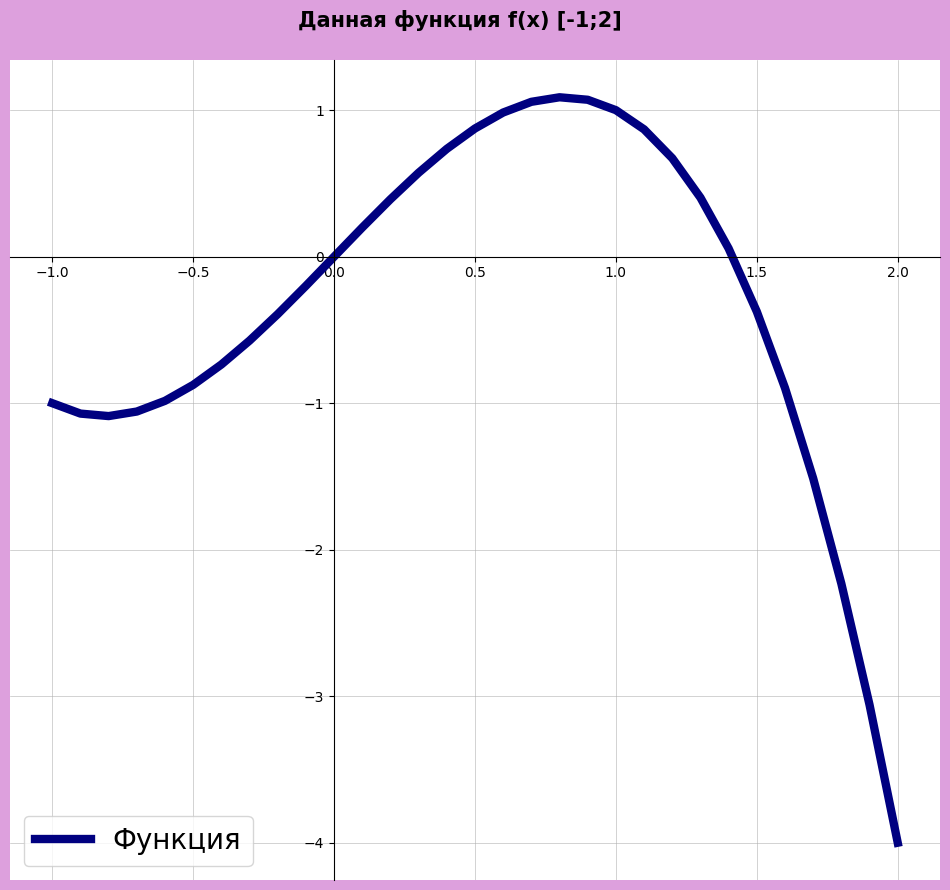

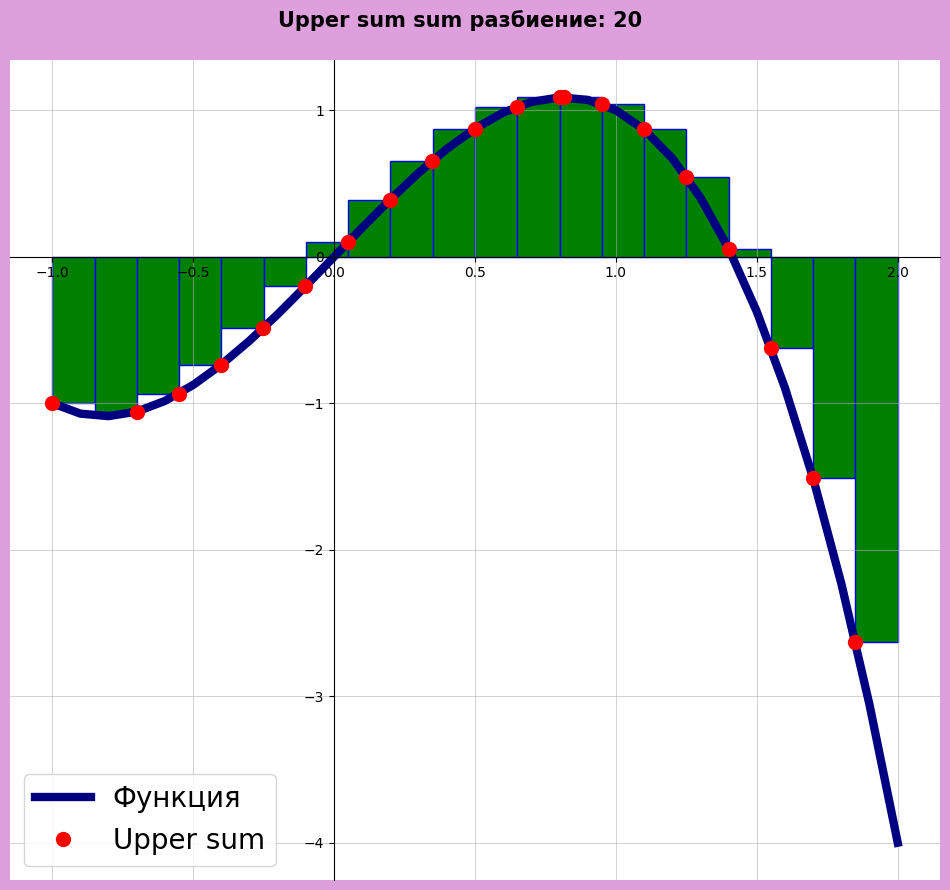

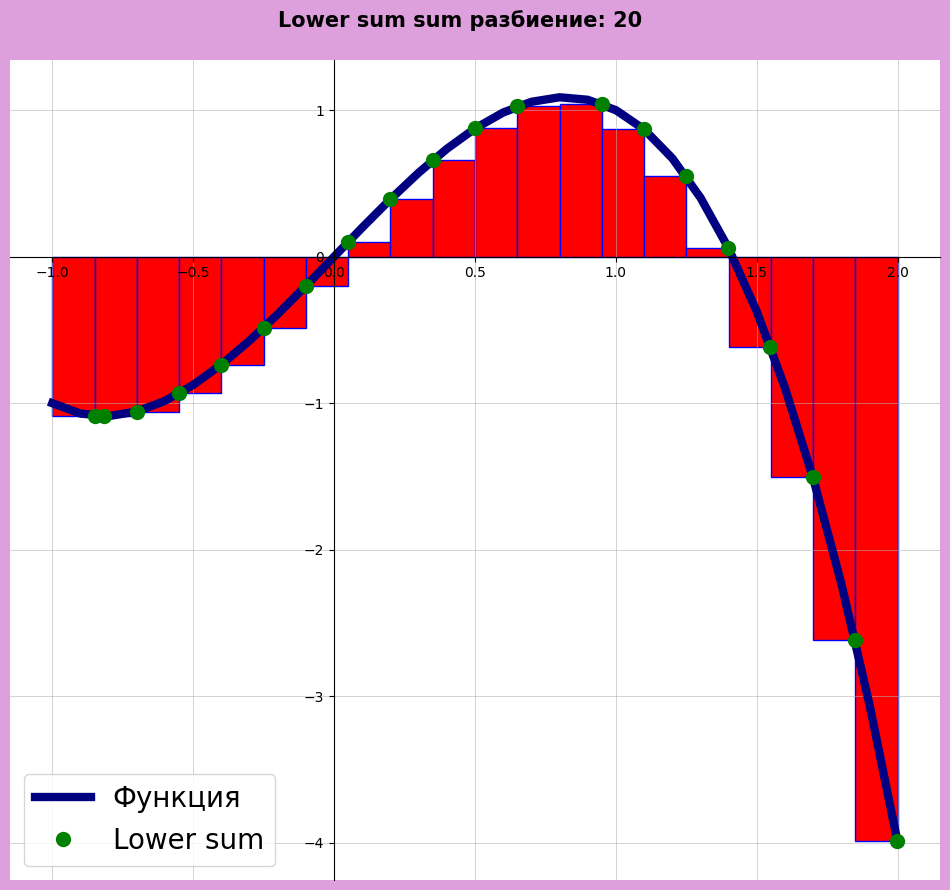

Upper sum:  -0.2173360092937519
Lower sum:  -1.3097581426312803


(-0.2173360092937519, -1.3097581426312803)

In [17]:
# Вывожу свою функцию с правильными точками верхней и нижней сумм
darbu_sums_correct(my_function, -1, 2, number)

In [21]:
# Сравнение результатов, вывод таблицы
def campare_values():
    # Создаю таблицу
    t = Texttable()
    # Добавляю строку заголовков
    # Буду выводить:
    # N : Число разбиений
    # LEFT : Вывод при левом оснащении
    # RIGHT : Вывод при правом оснащении
    # CENTER : Вывод при центральном оснащении
    # RANDOM : ВЫвод при рандомном оснащении
    # CORRECT LOW : Вывод "правильной" нижней суммы
    # CORRECT UP : Вывод "правильной" верхней суммы
    # ANALITIC RES -3/4 : Вывод цели, к чему стремятся все верхние значения
    t.add_row(['N', 'LEFT', 'RIGHT', 'CENTER', 'RANDOM', 'COR\nLOW', 'COR\nUP', 'ANAL\nRES\n-3/4'])
    
    # Вывожу результаты с разбиением 1-752 с шагом 250
    for i in range(20, 171, 25):
        
        kind = 'left'
        left = darbu_sums_methods(function, start, end, i, kind, False)
        
        kind = 'right'
        right = darbu_sums_methods(function, start, end, i, kind, False)
        
        kind = 'center'
        centre = darbu_sums_methods(function, start, end, i, kind, False)
        
        kind = 'random'
        random = darbu_sums_methods(function, start, end, i, kind, False)
        
        correct = darbu_sums_correct(function, -1, 2, i, False)
        
        # Добавляем строку
        t.add_row([i, left, right, centre, random, correct[1], correct[0], -3/4])
    # Вывод таблицы
    return t.draw()

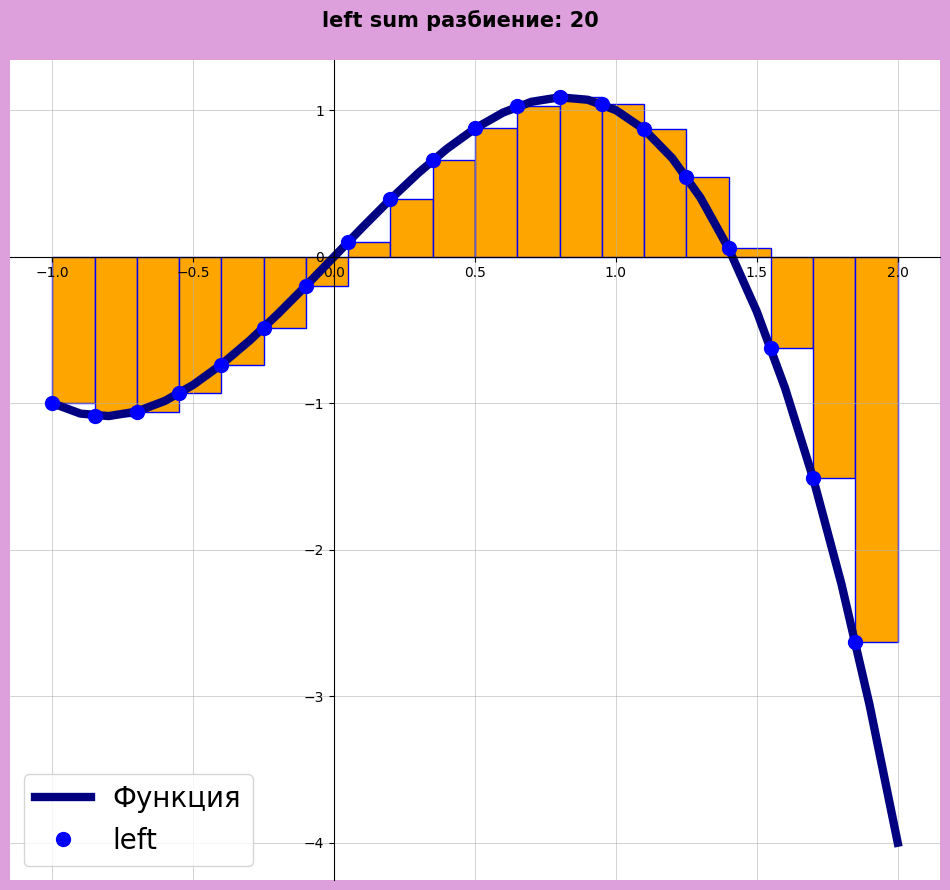

left -0.5418749999999996


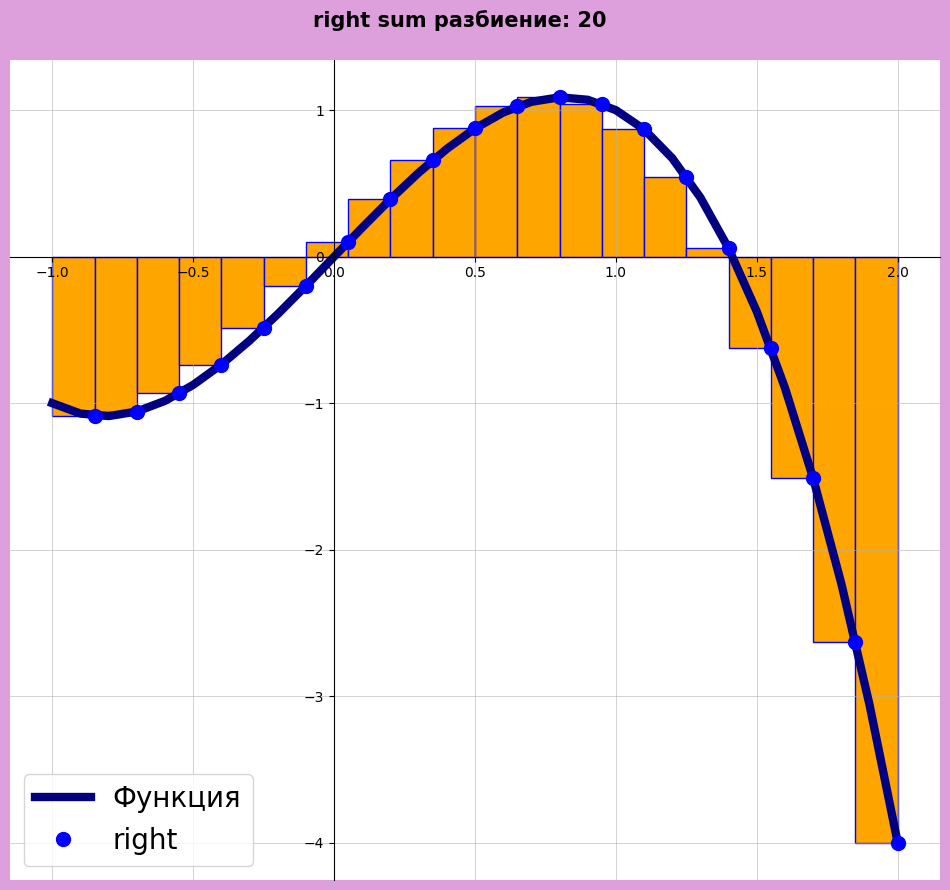

right -0.9918749999999995


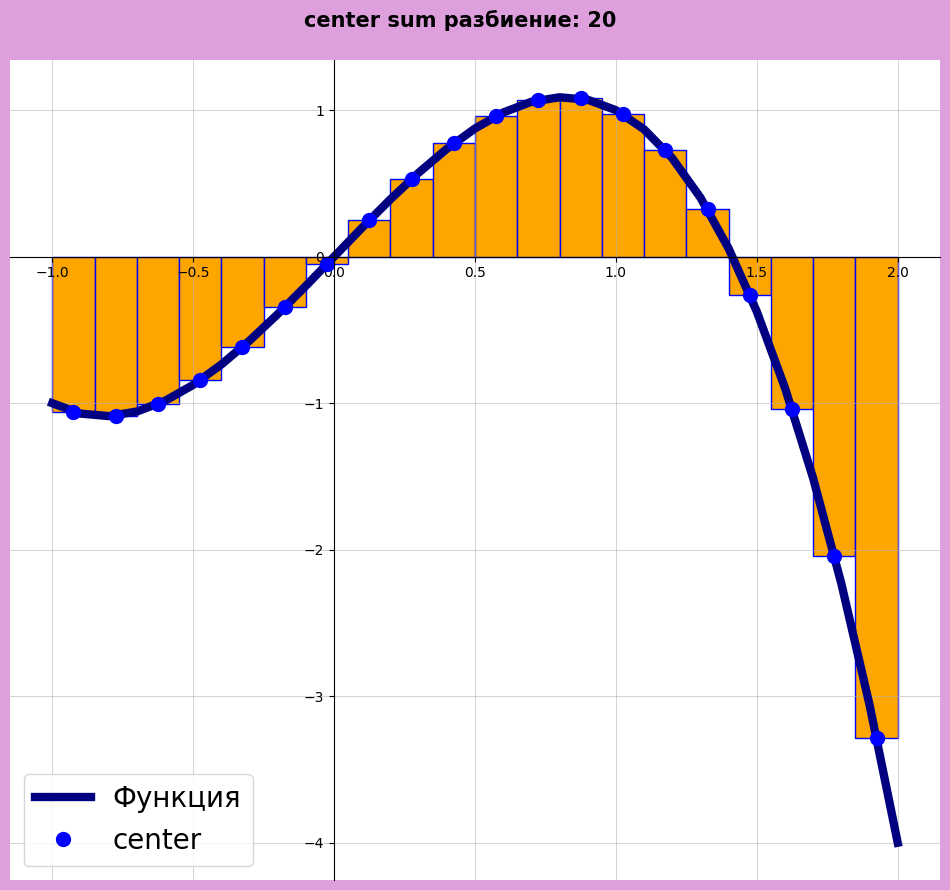

center -0.7415624999999996


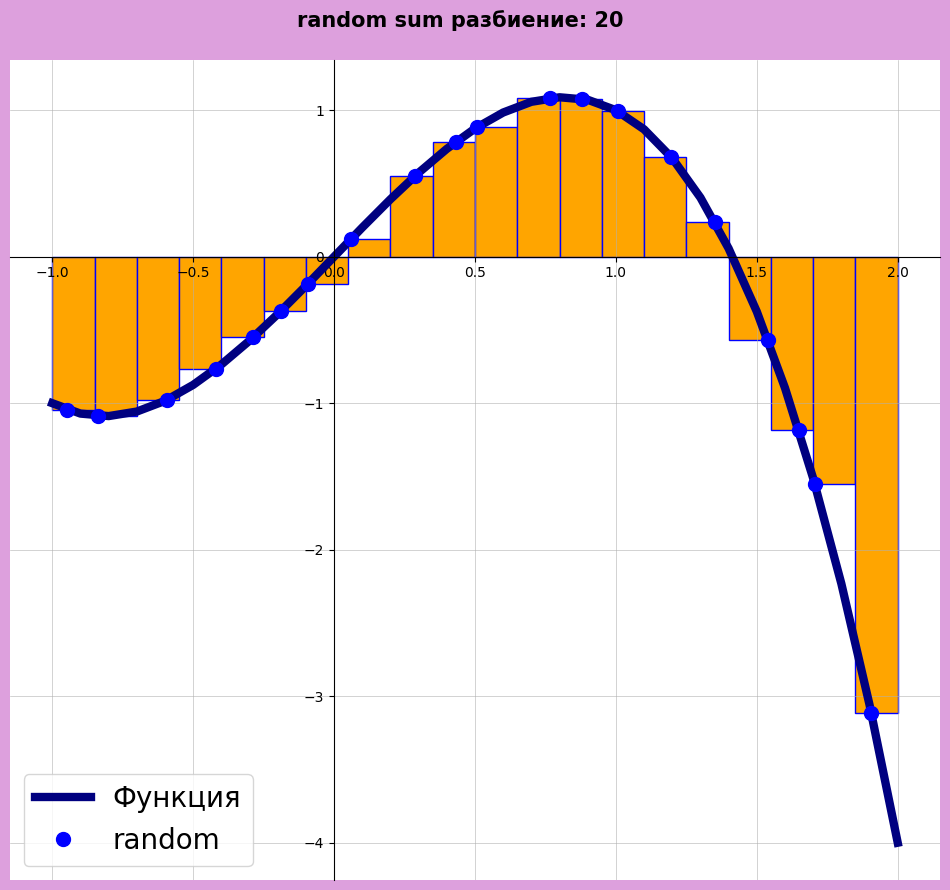

random -0.7473545921627011


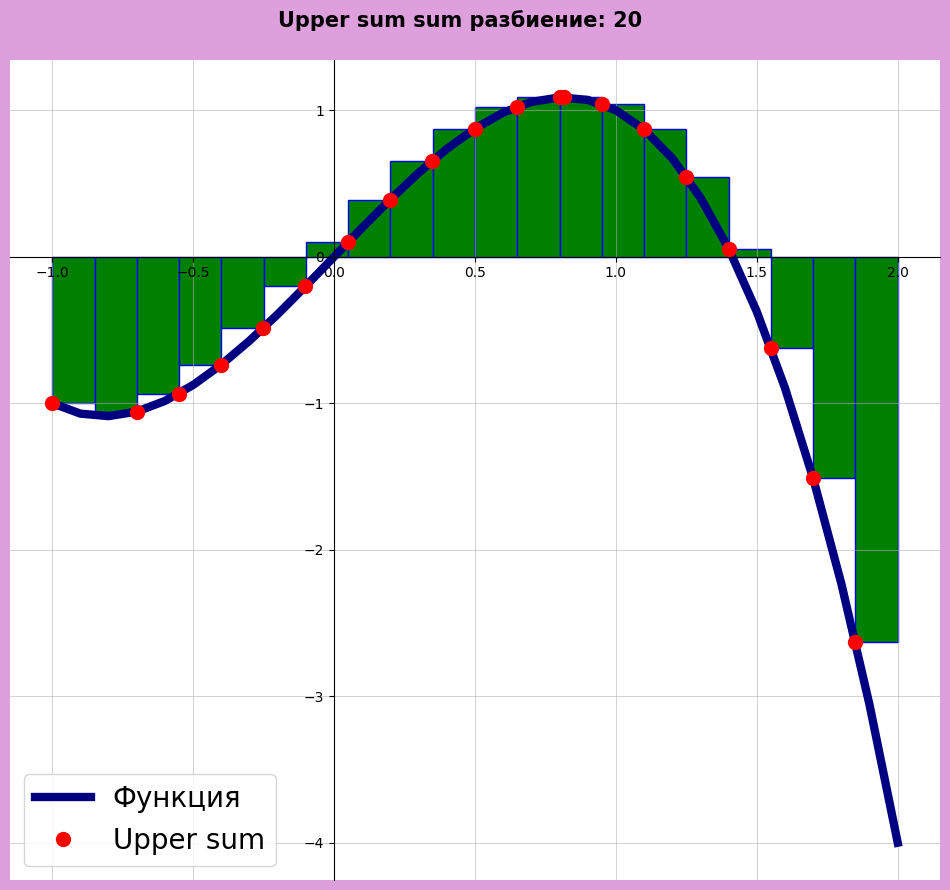

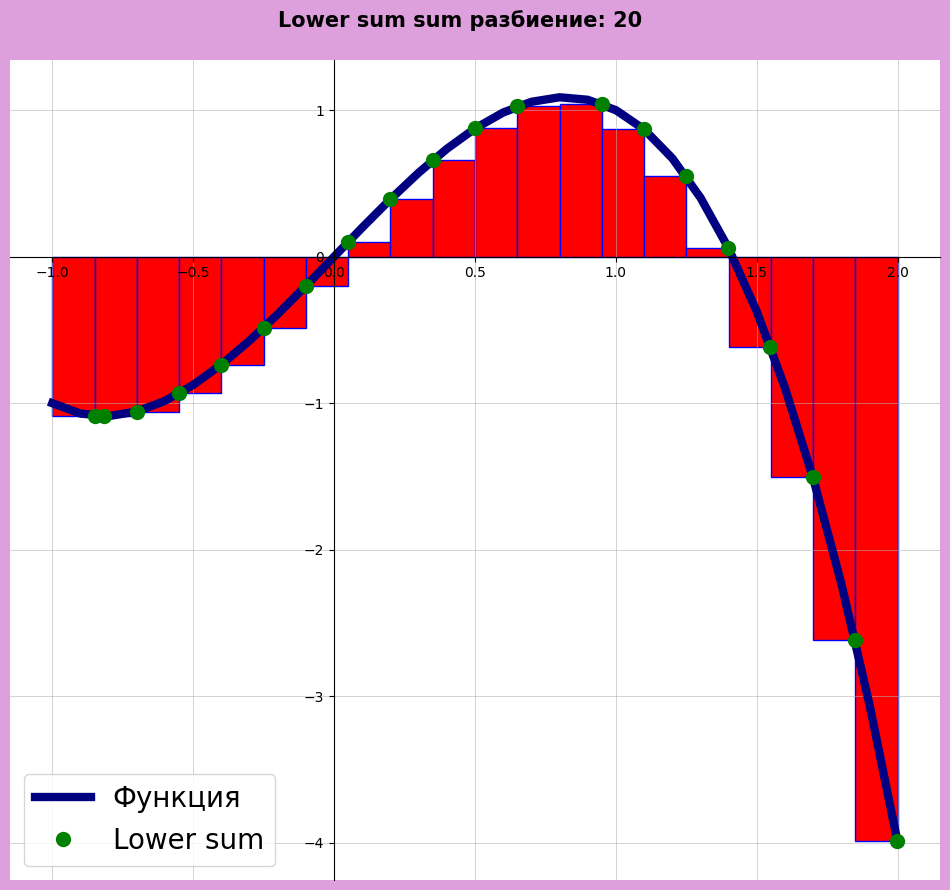

Upper sum:  -0.2173360092937519
Lower sum:  -1.3097581426312803


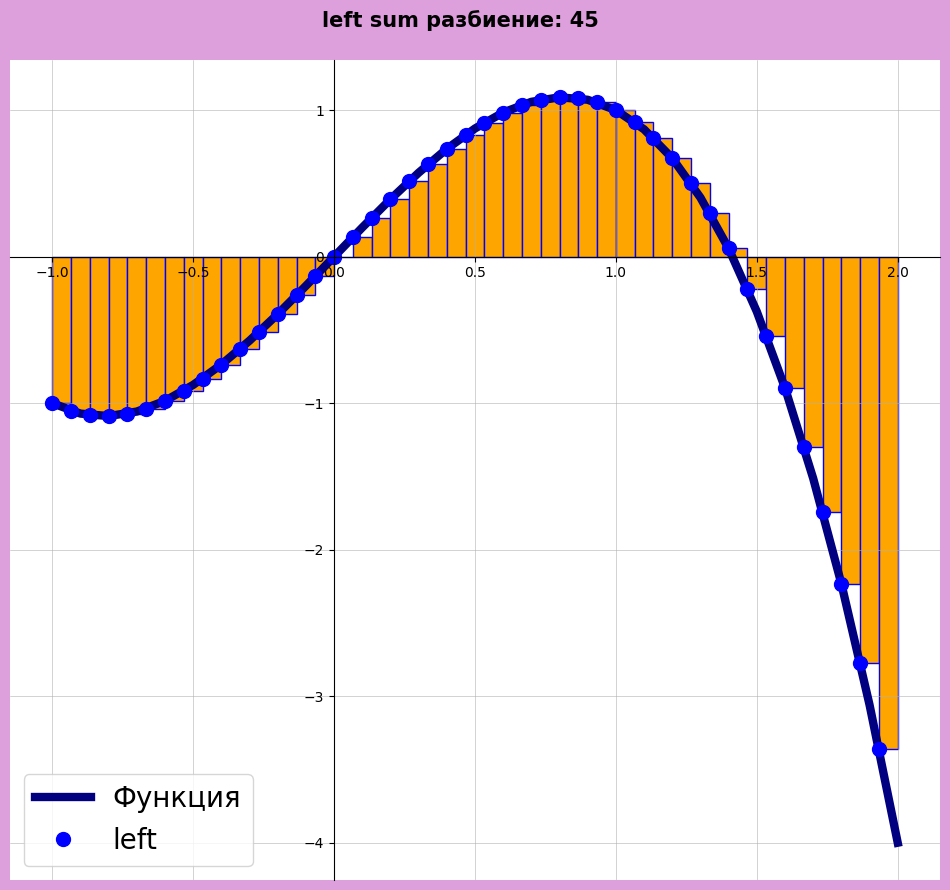

left -0.6533333333333331


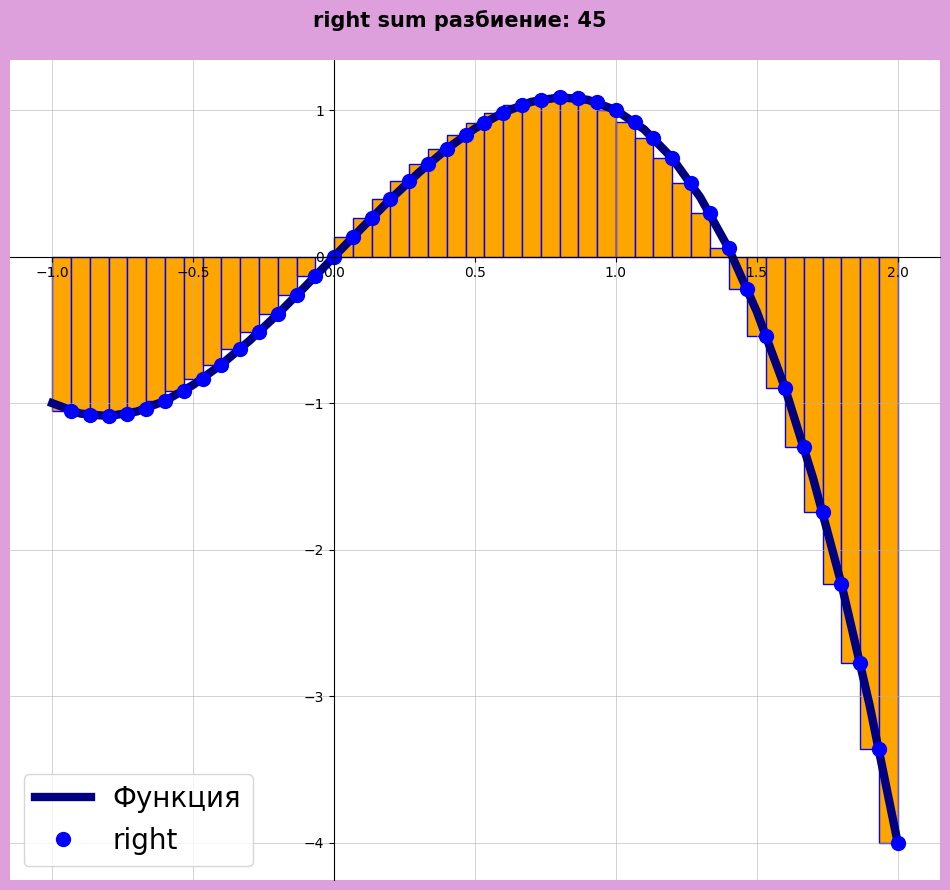

right -0.8533333333333332


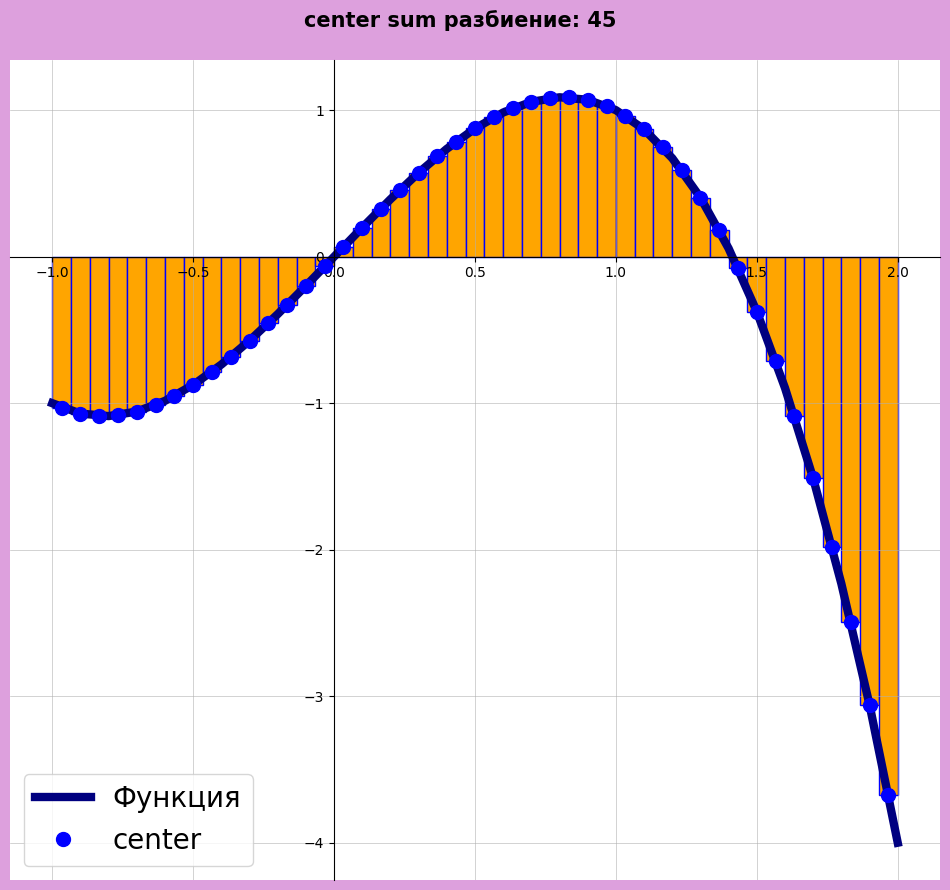

center -0.7483333333333336


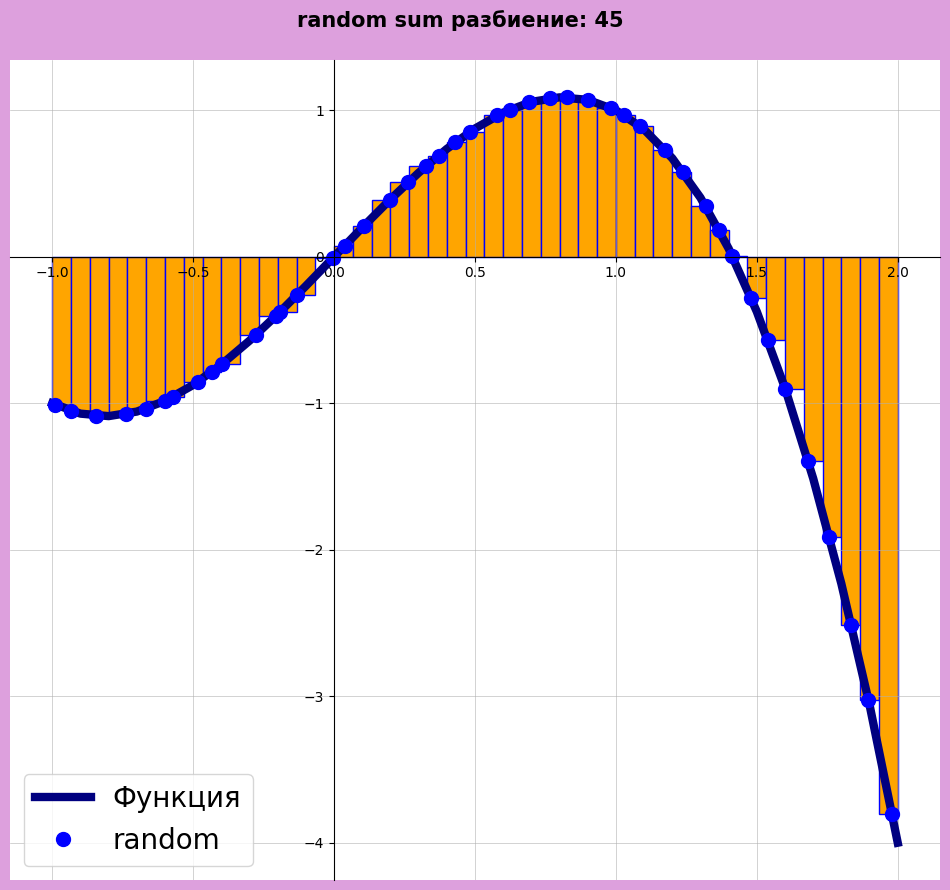

random -0.6967912126726417


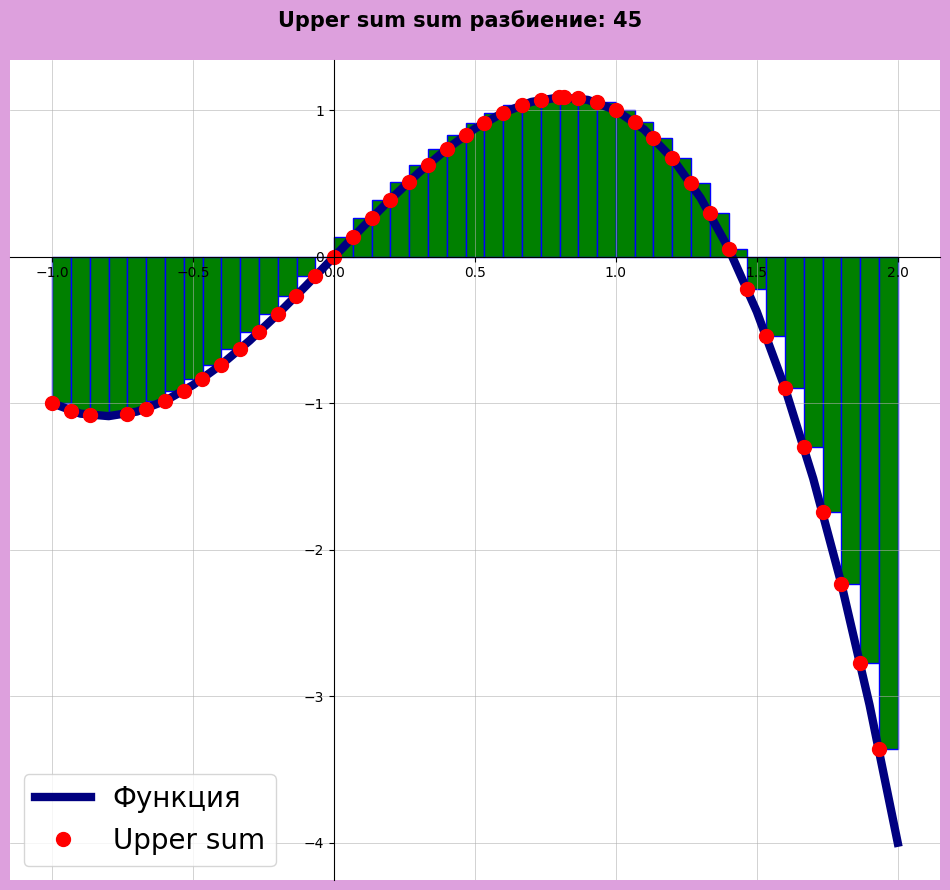

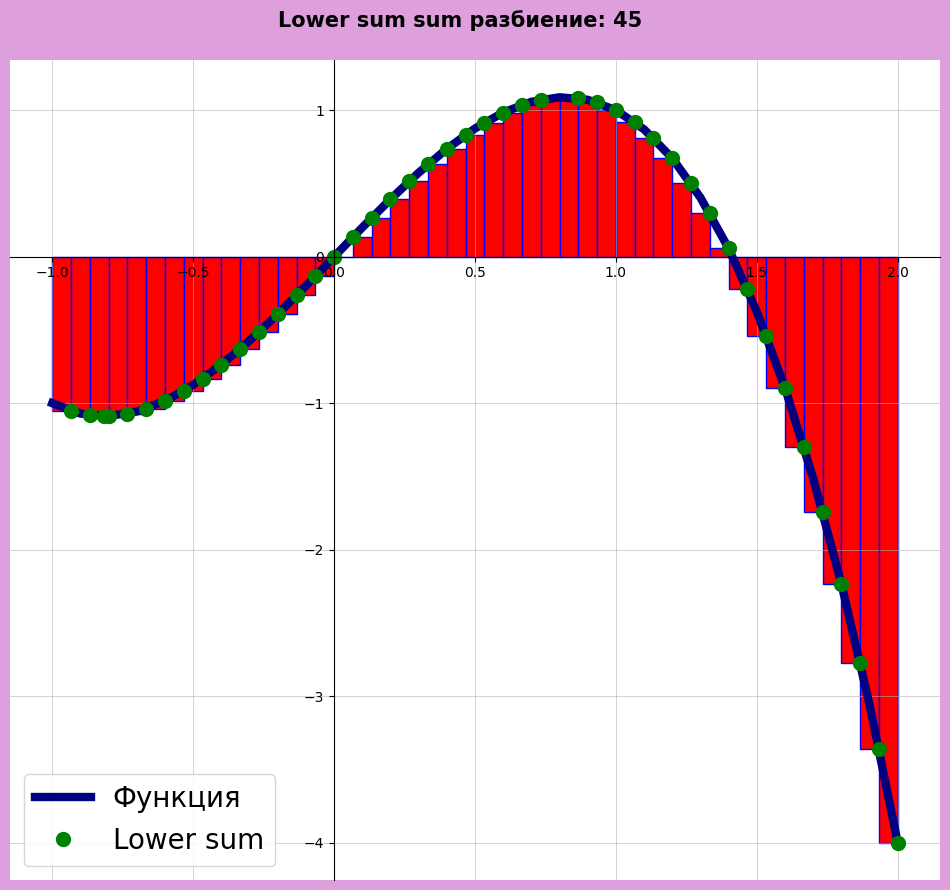

Upper sum:  -0.5090735409185181
Lower sum:  -0.9983227431110727


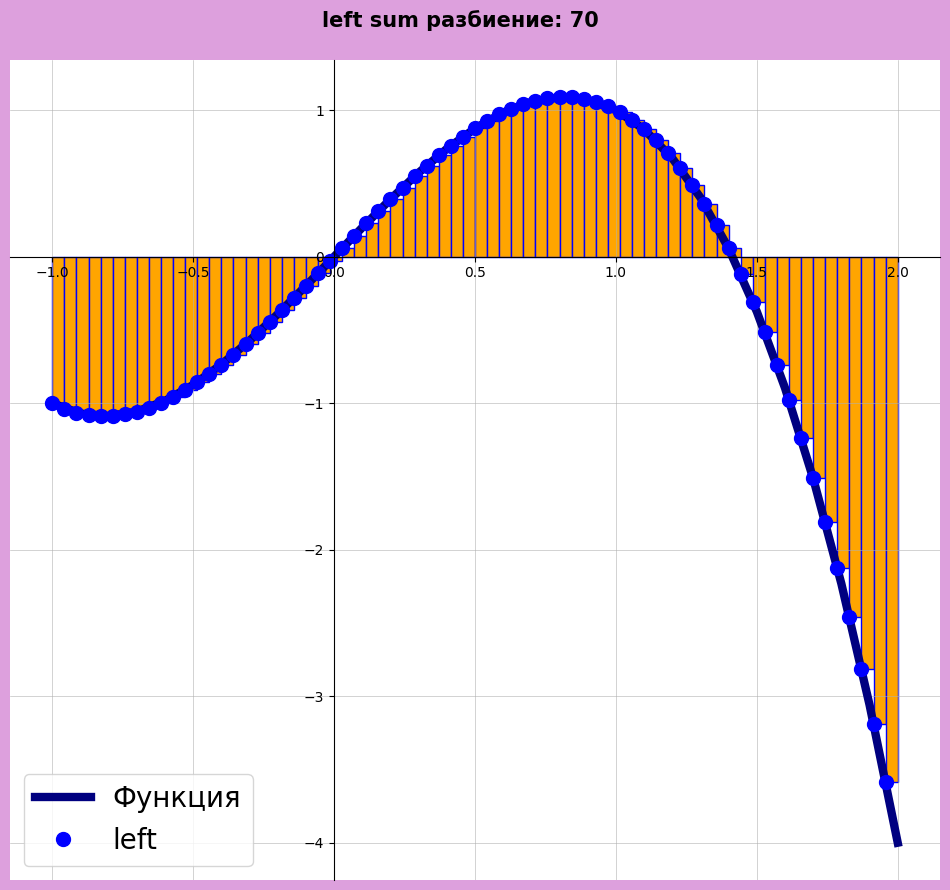

left -0.6870918367346942


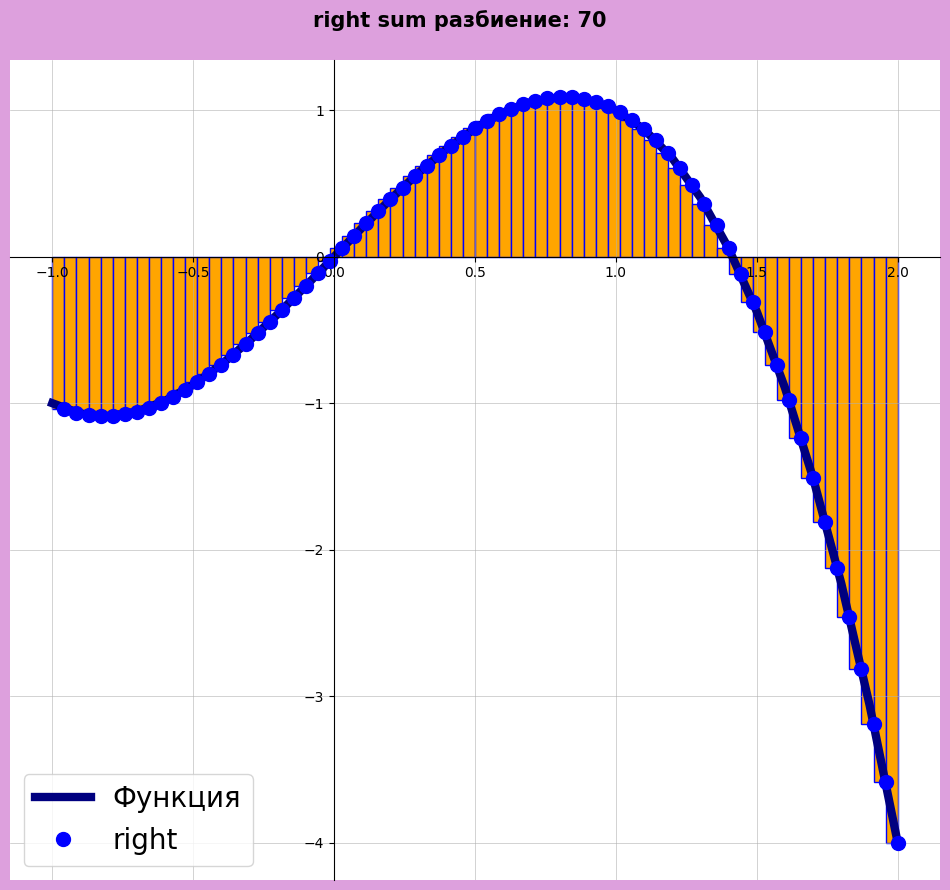

right -0.8156632653061228


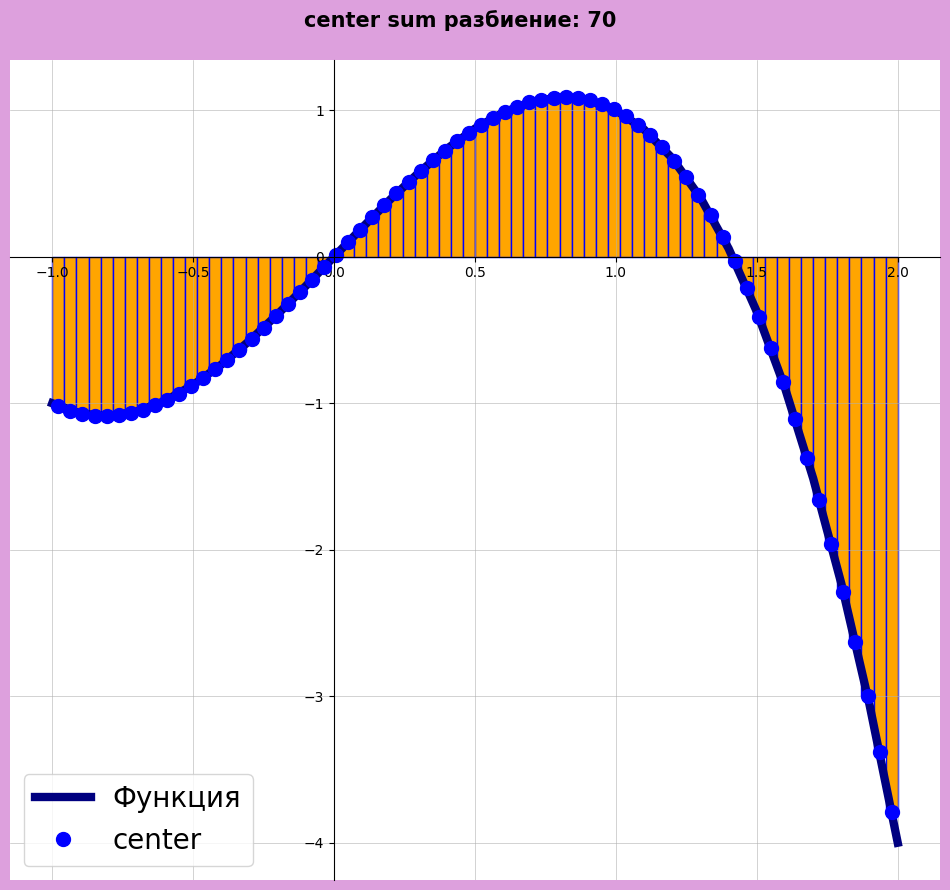

center -0.7493112244897959


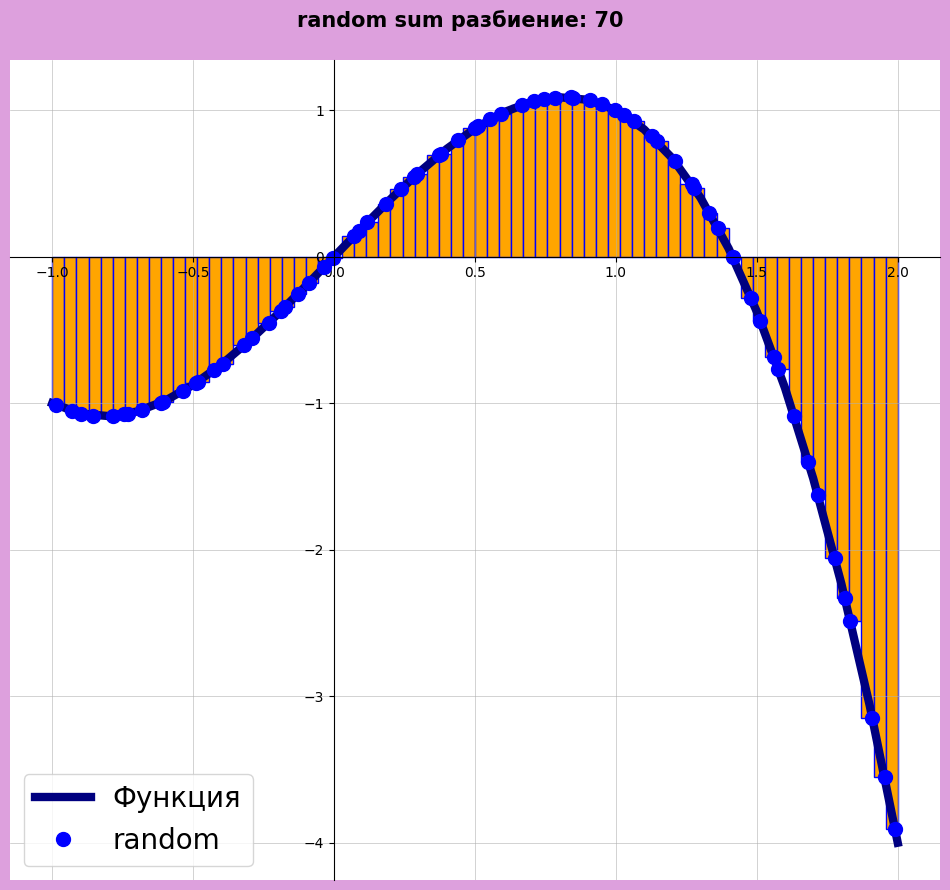

random -0.7596064119076746


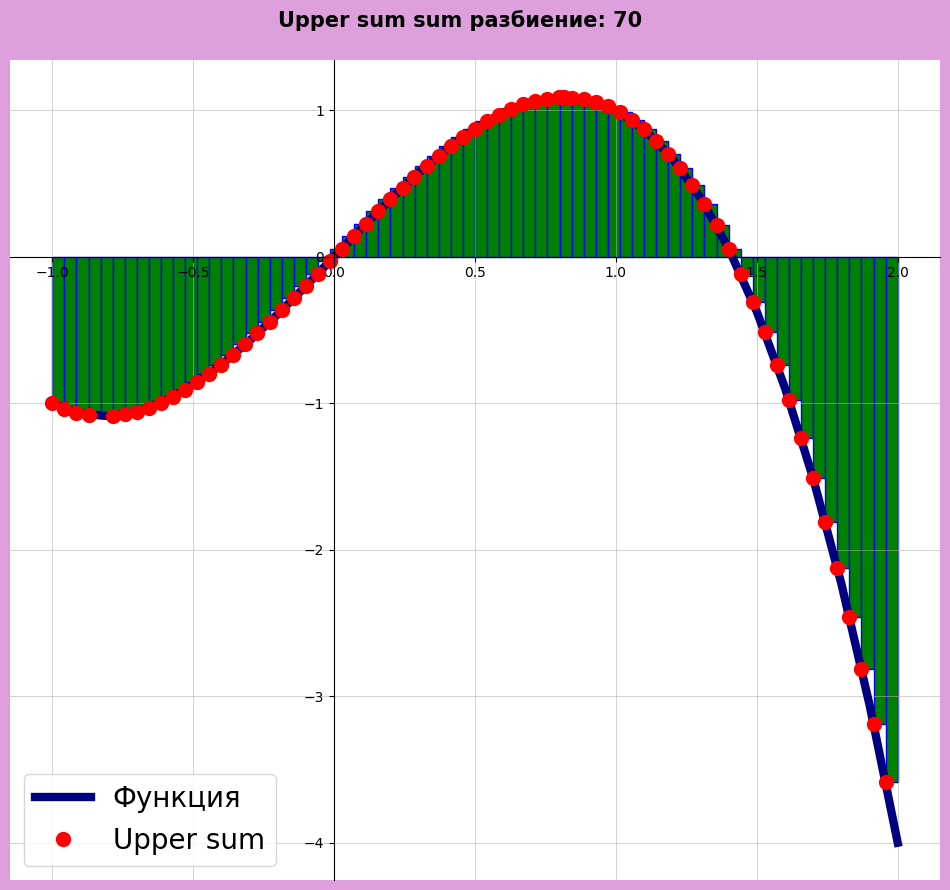

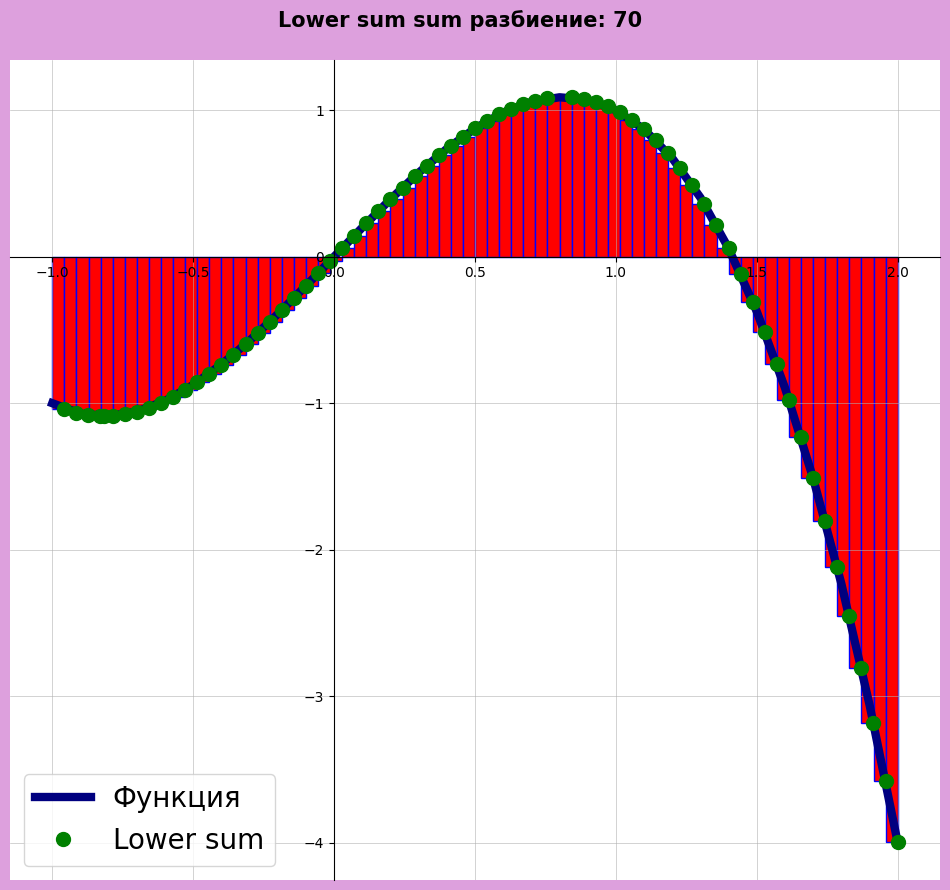

Upper sum:  -0.5945166550245716
Lower sum:  -0.9066467486014251


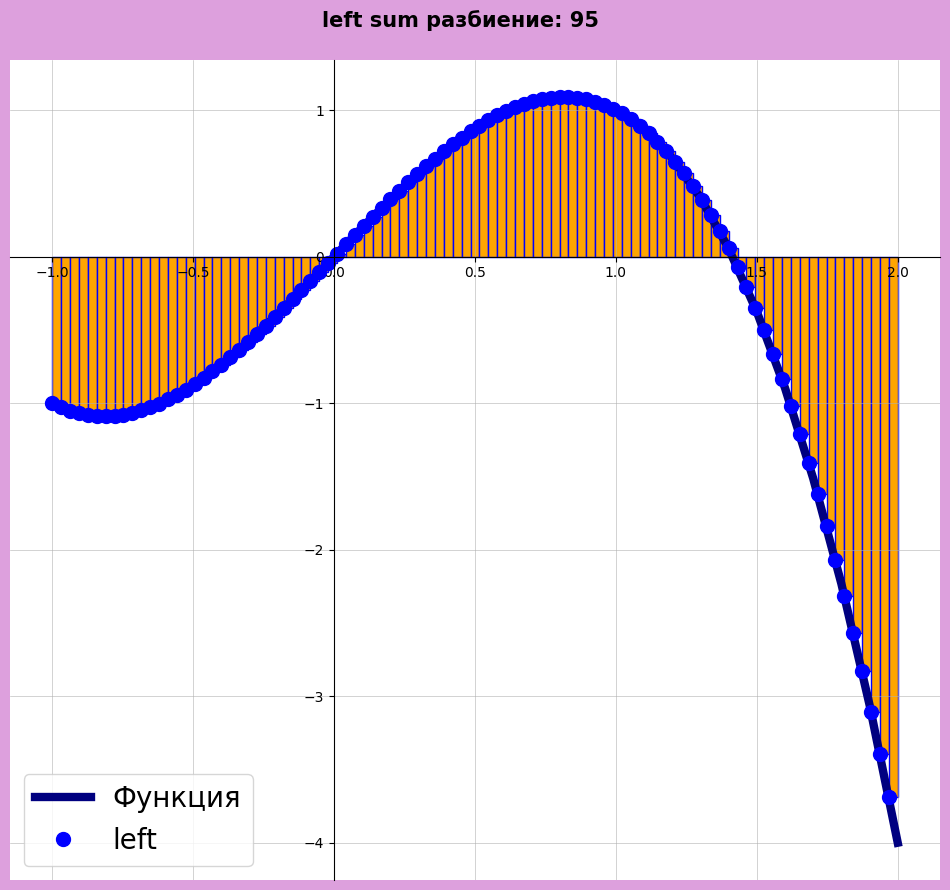

left -0.7033795013850419


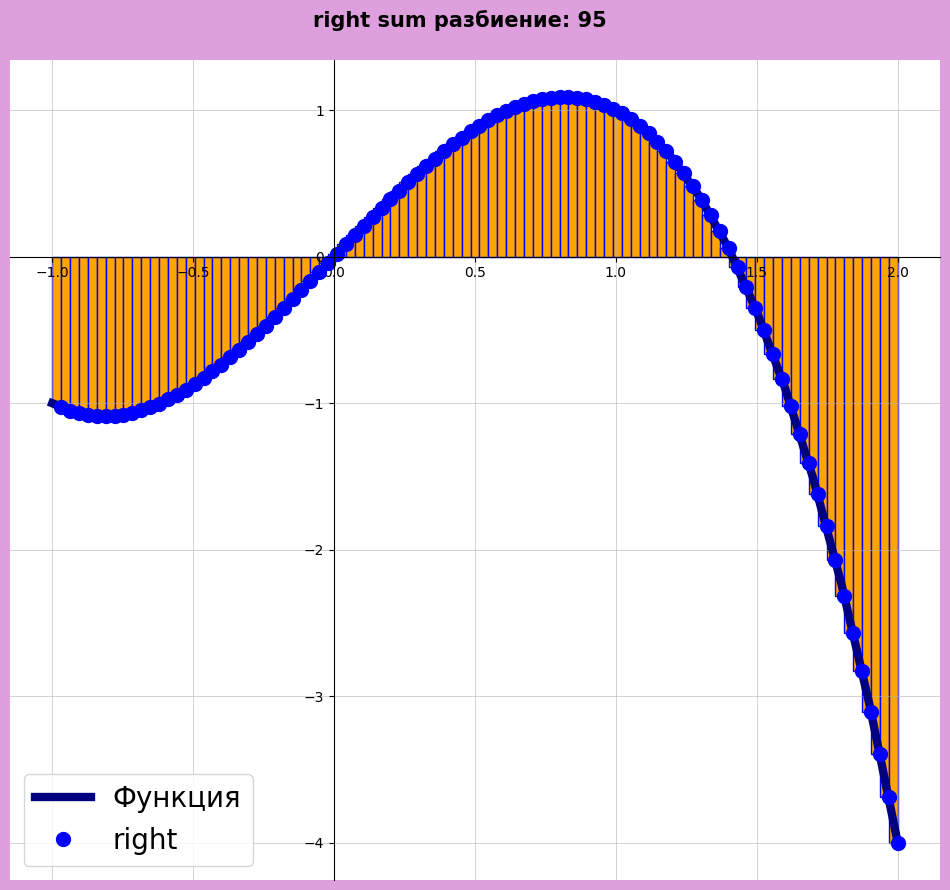

right -0.798116343490305


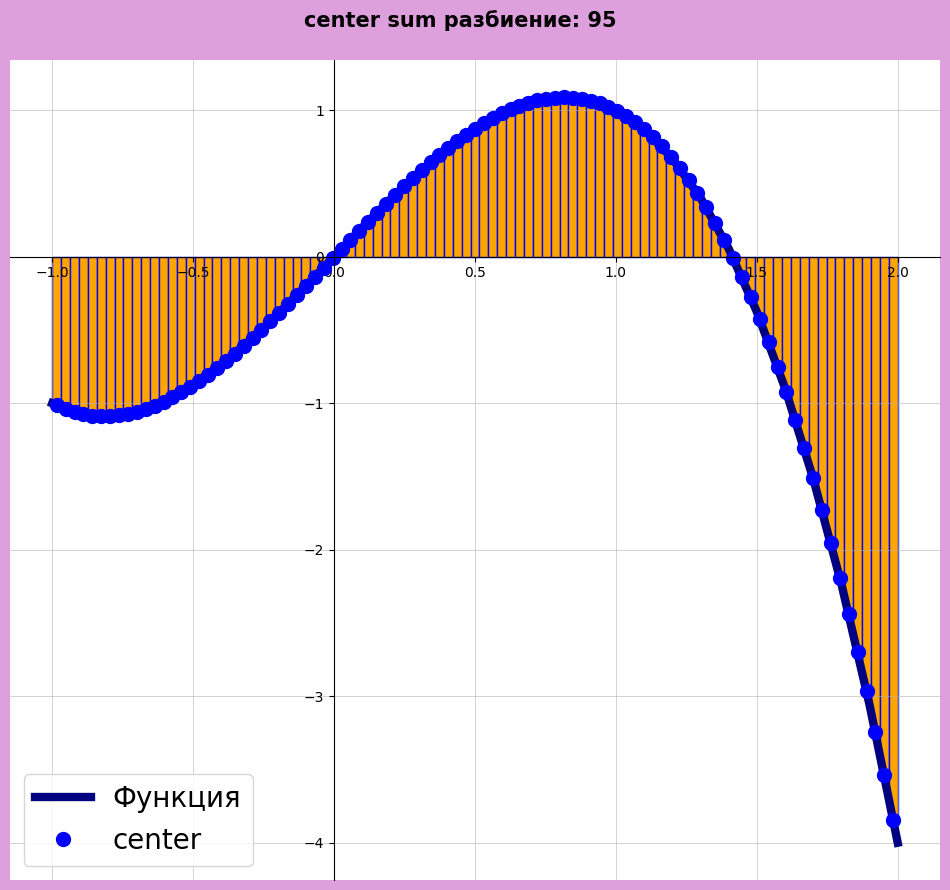

center -0.7496260387811639


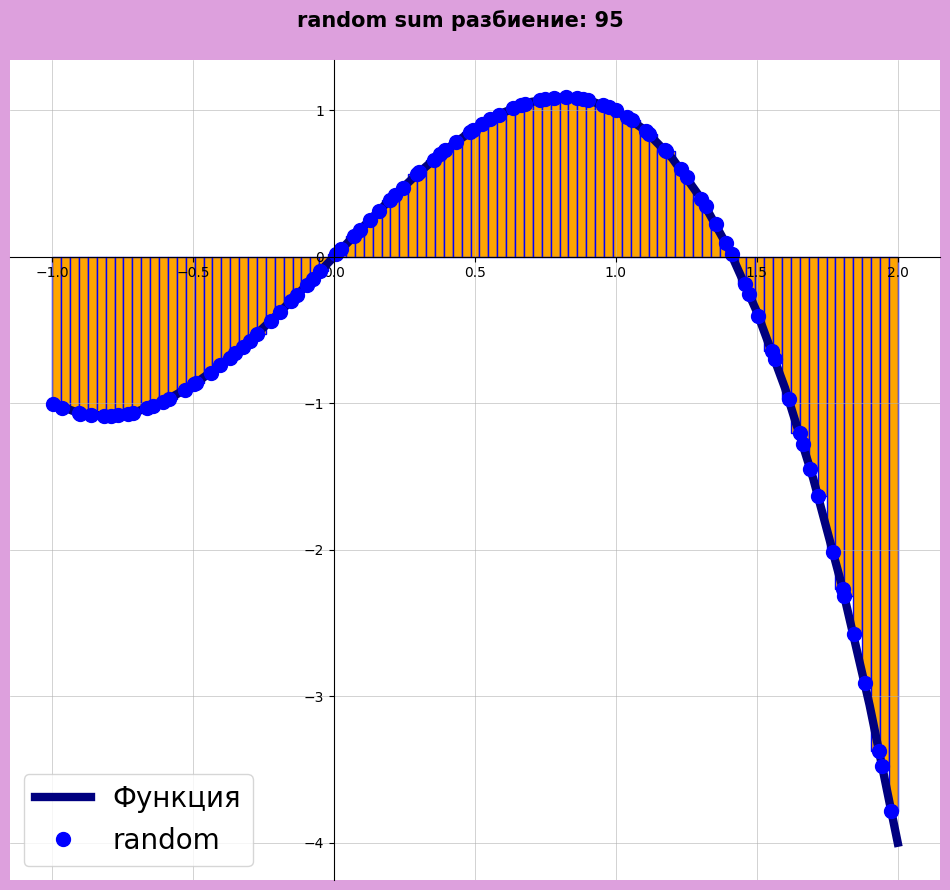

random -0.7395572004021873


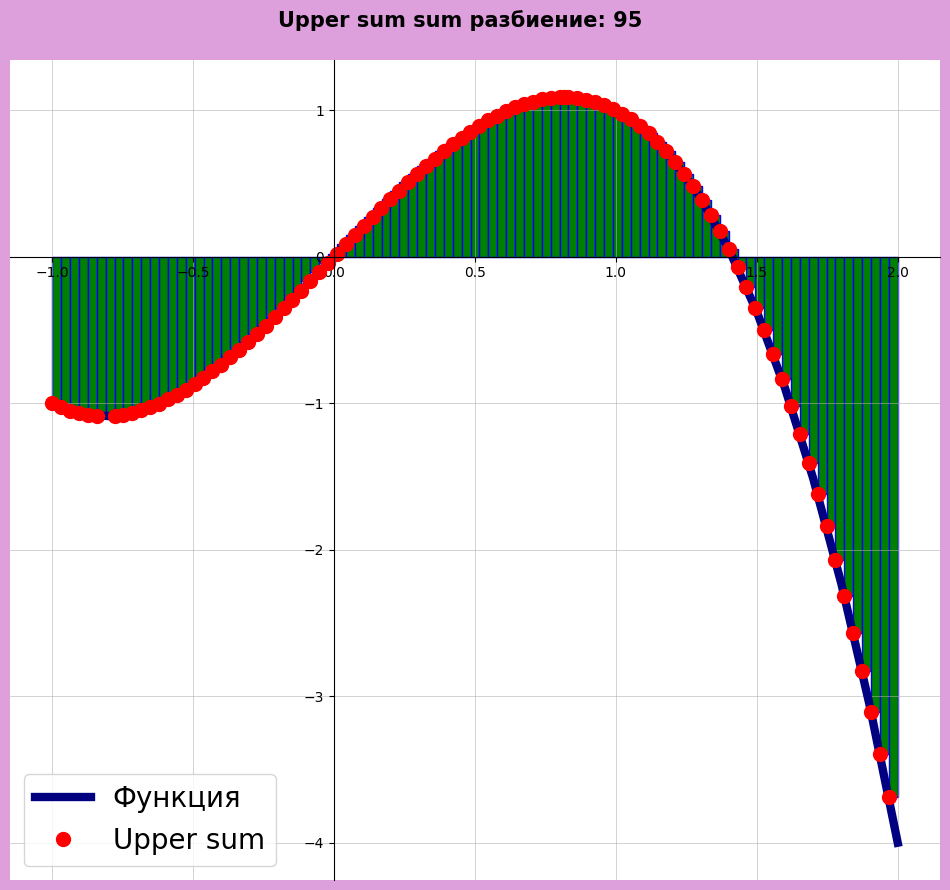

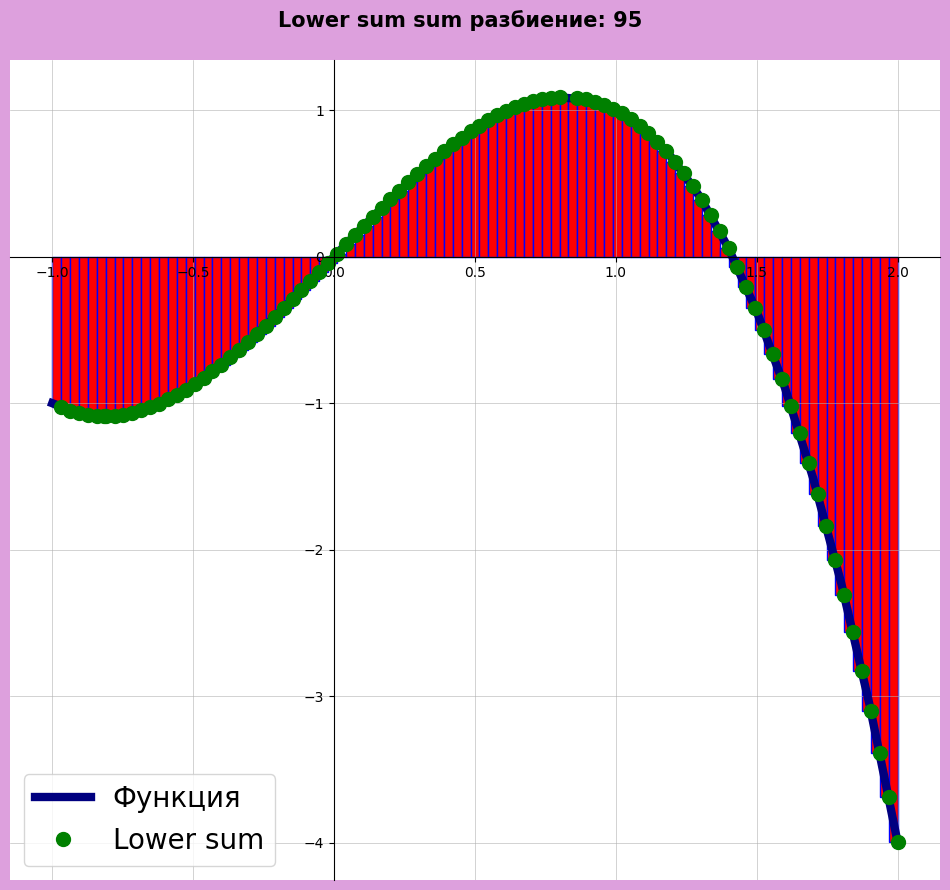

Upper sum:  -0.6351290065594849
Lower sum:  -0.8652291880060025


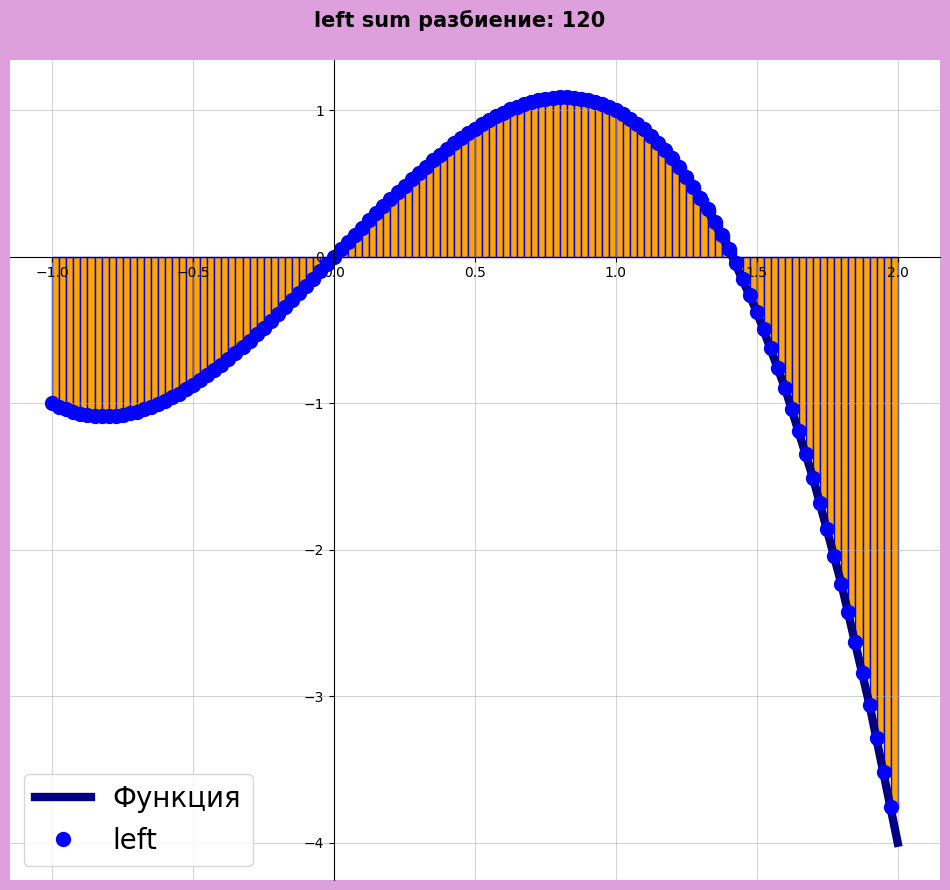

left -0.7129687500000008


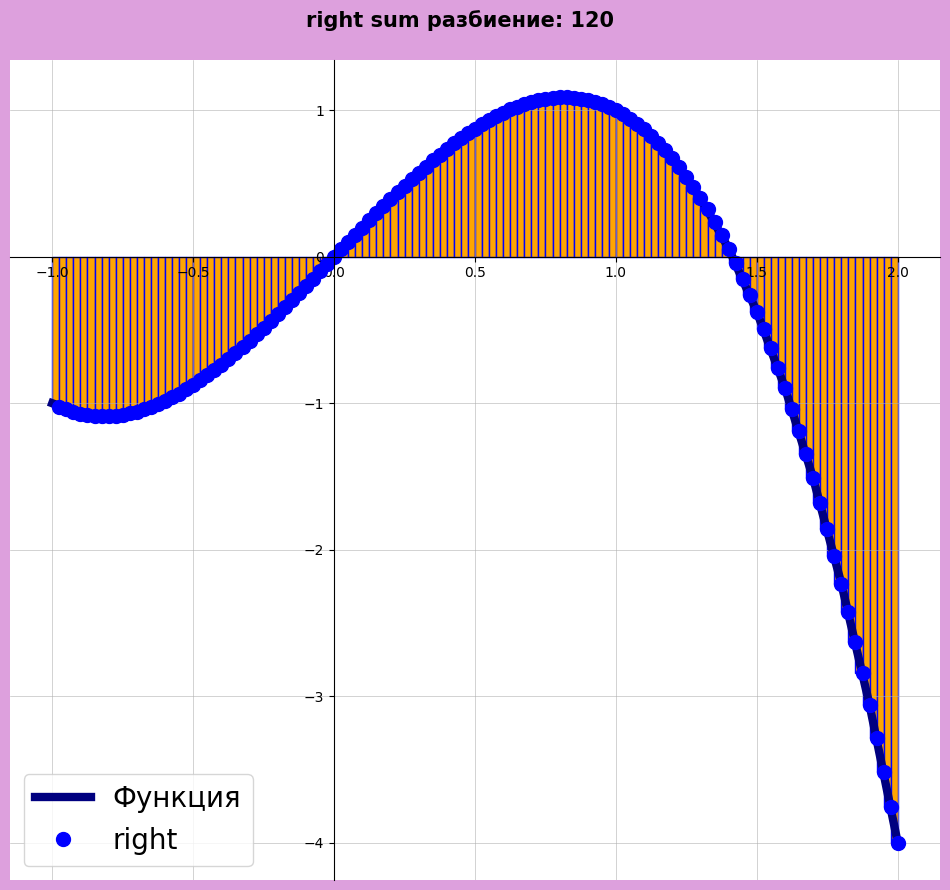

right -0.787968750000001


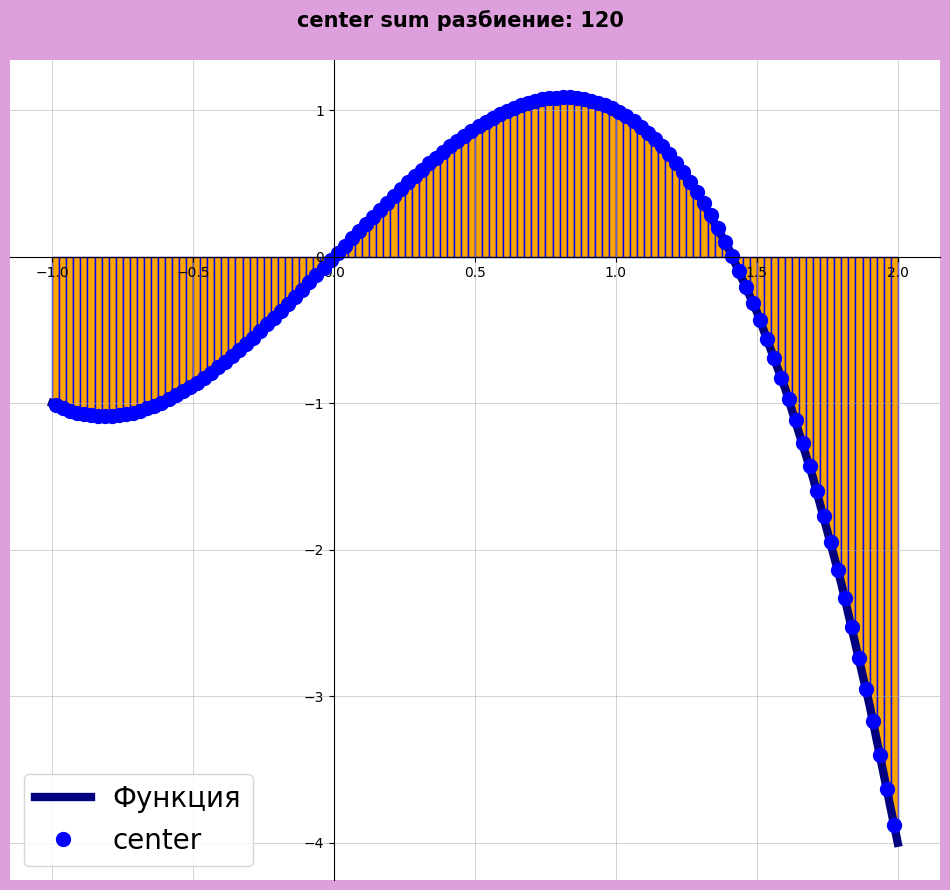

center -0.7497656250000007


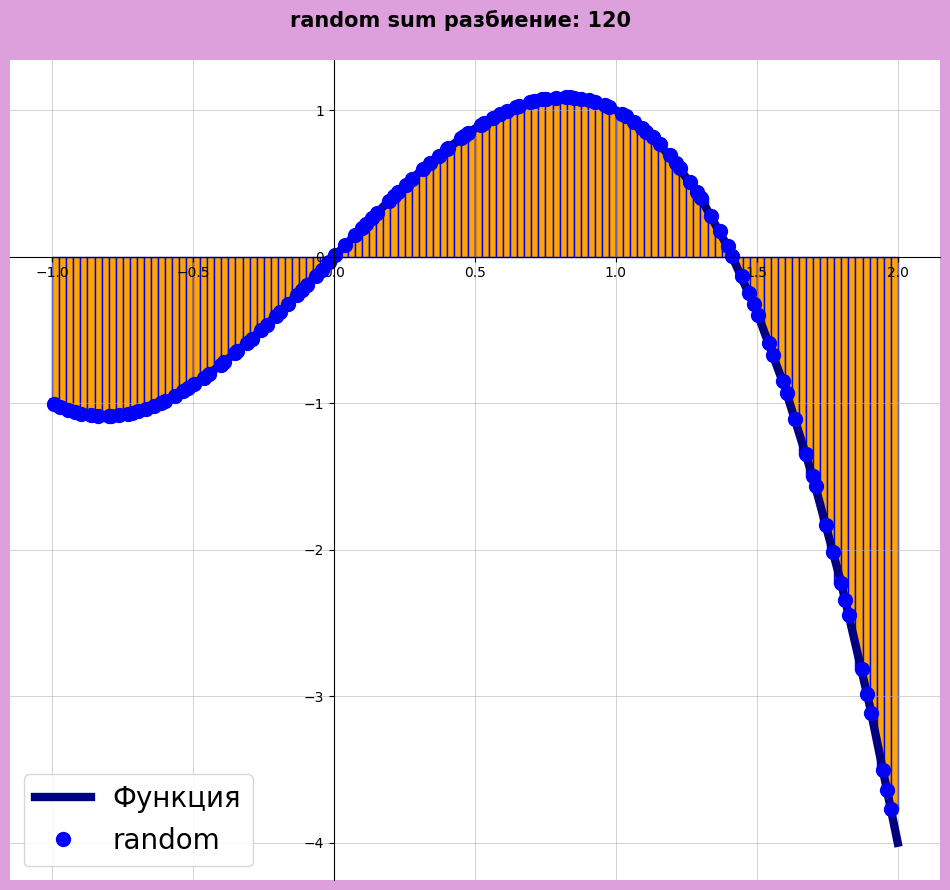

random -0.7589191988001868


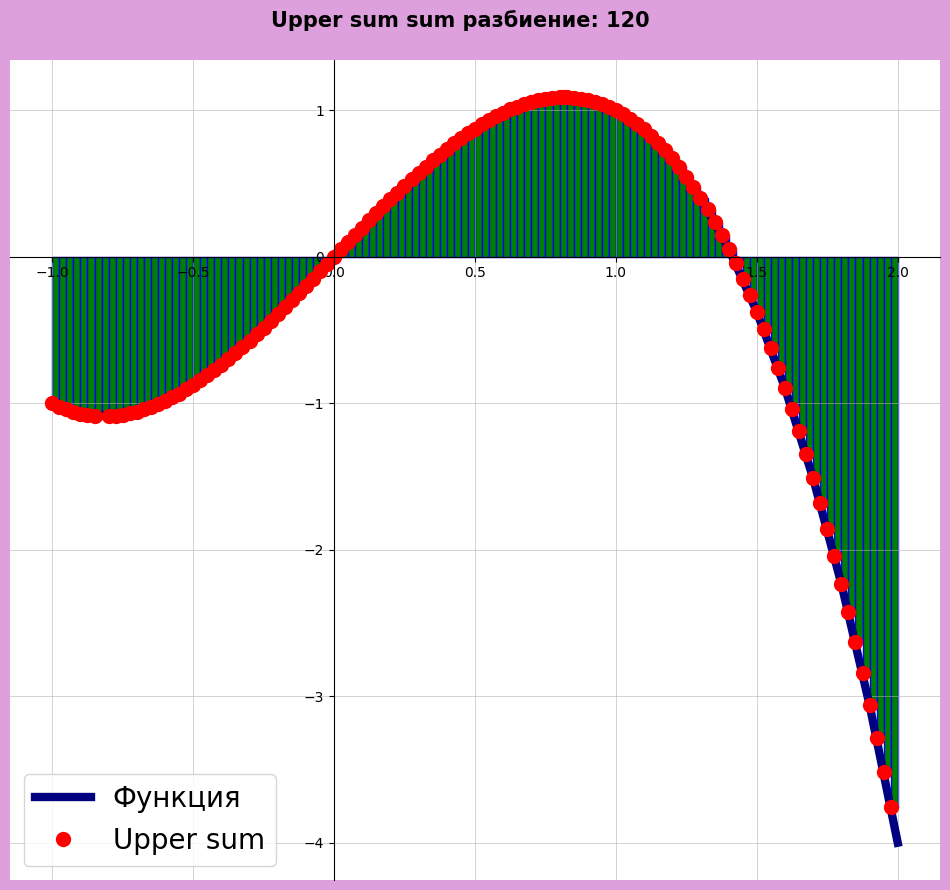

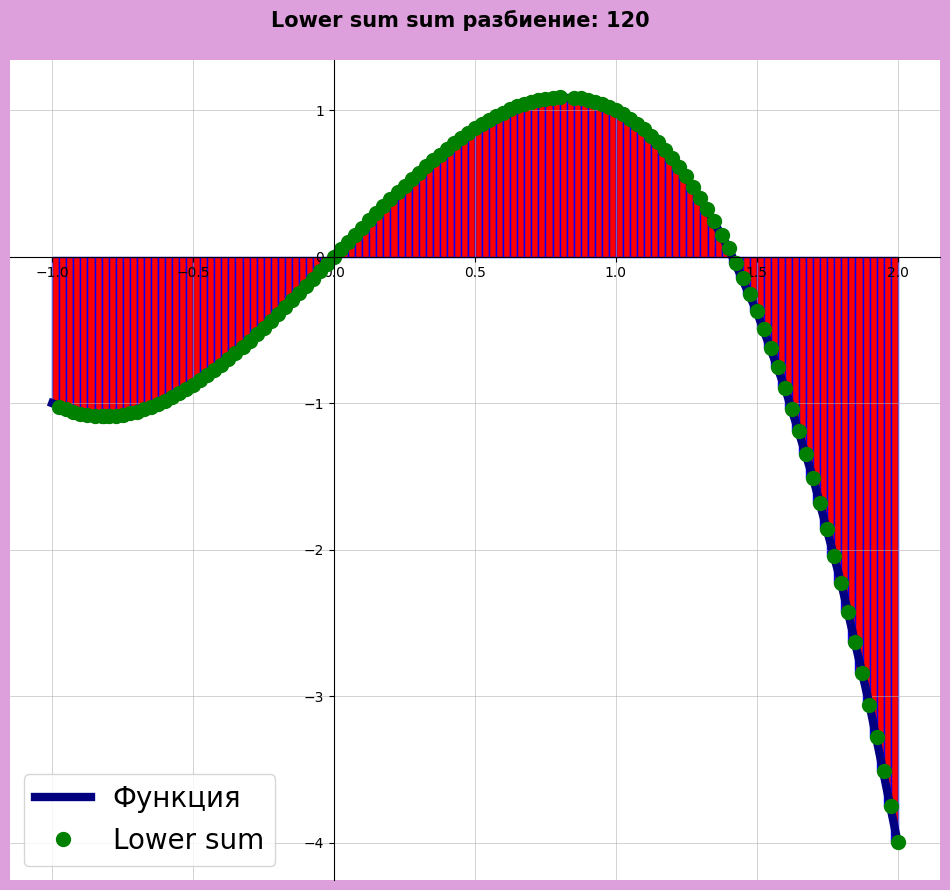

Upper sum:  -0.6586366579640665
Lower sum:  -0.8411194925250426


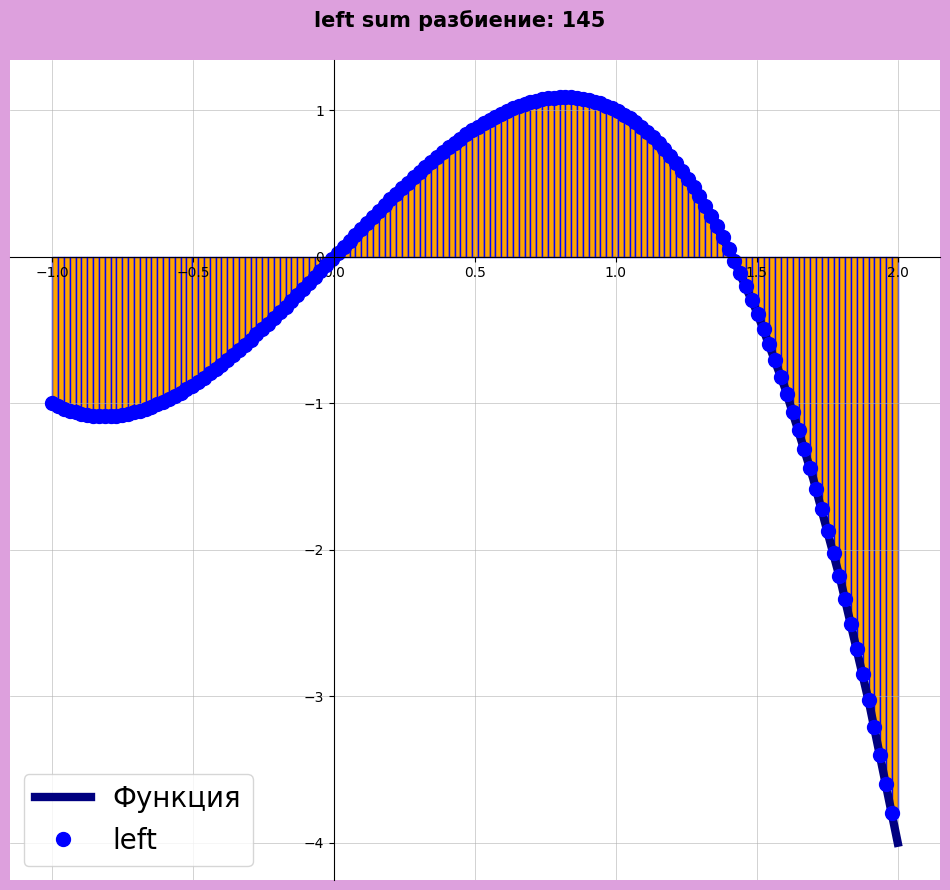

left -0.7192865636147443


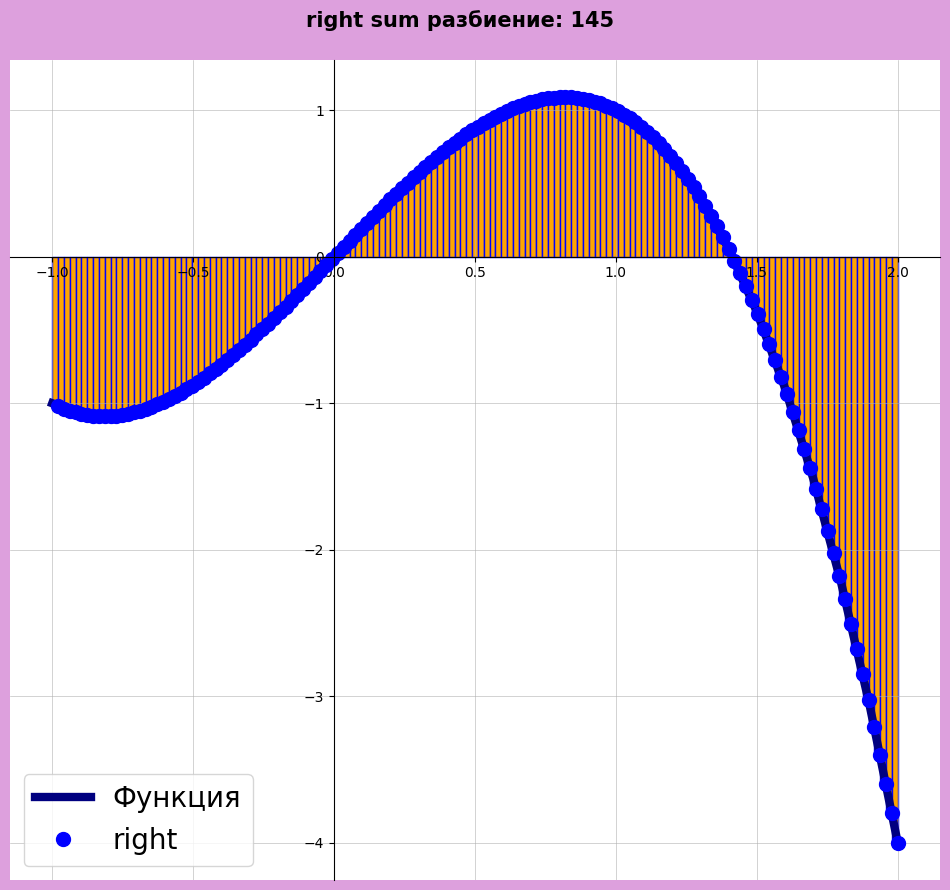

right -0.7813555291319854


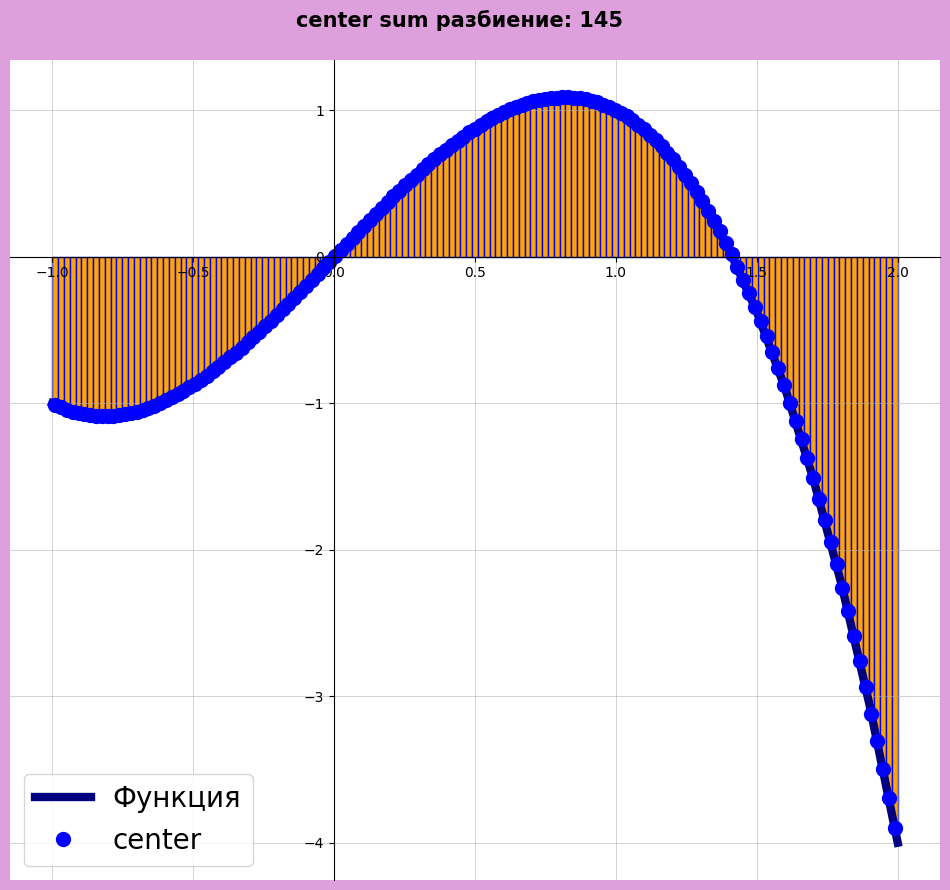

center -0.7498394768133165


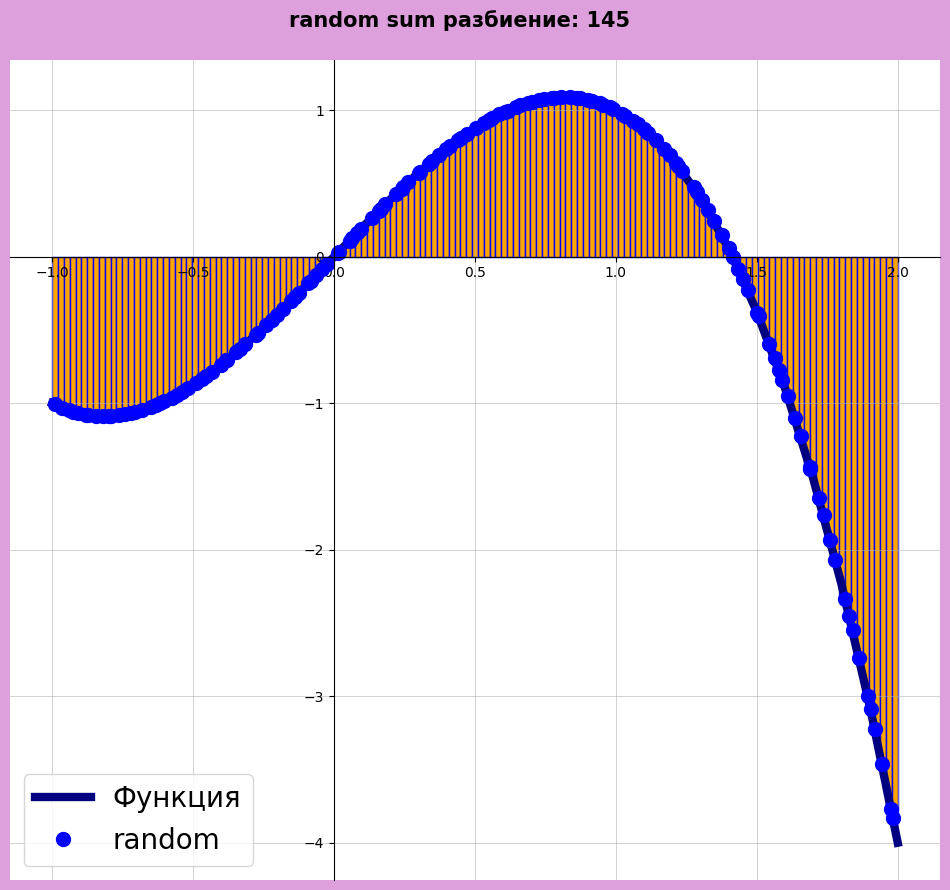

random -0.75032385973748


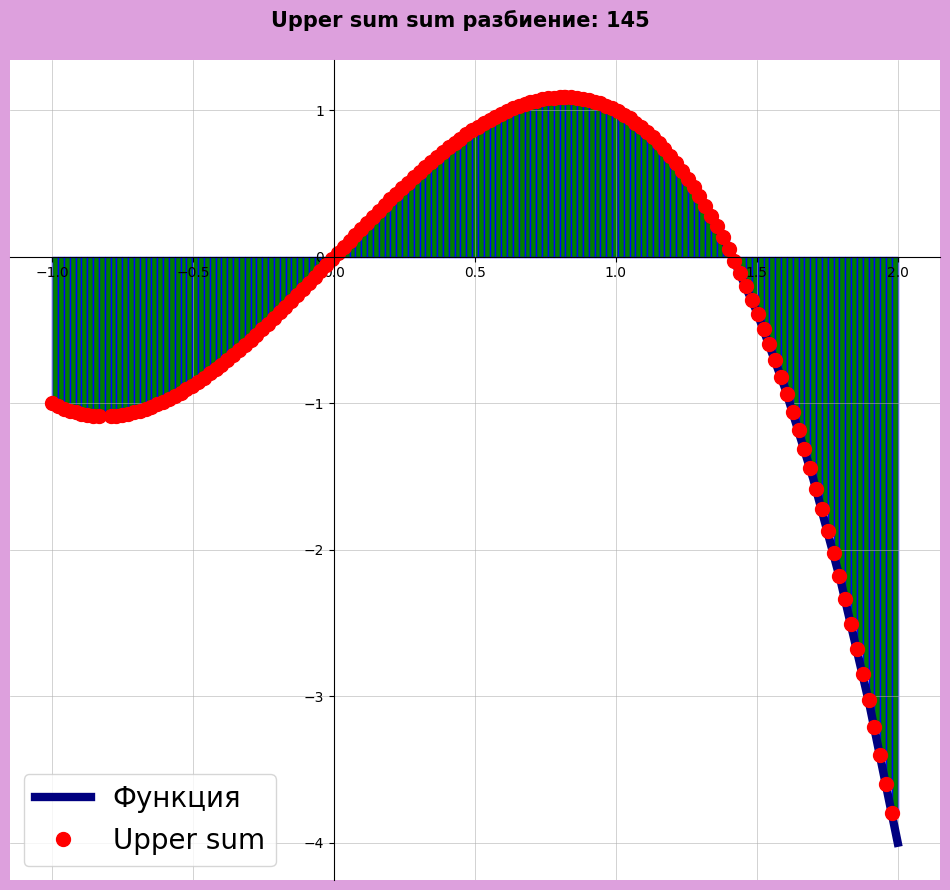

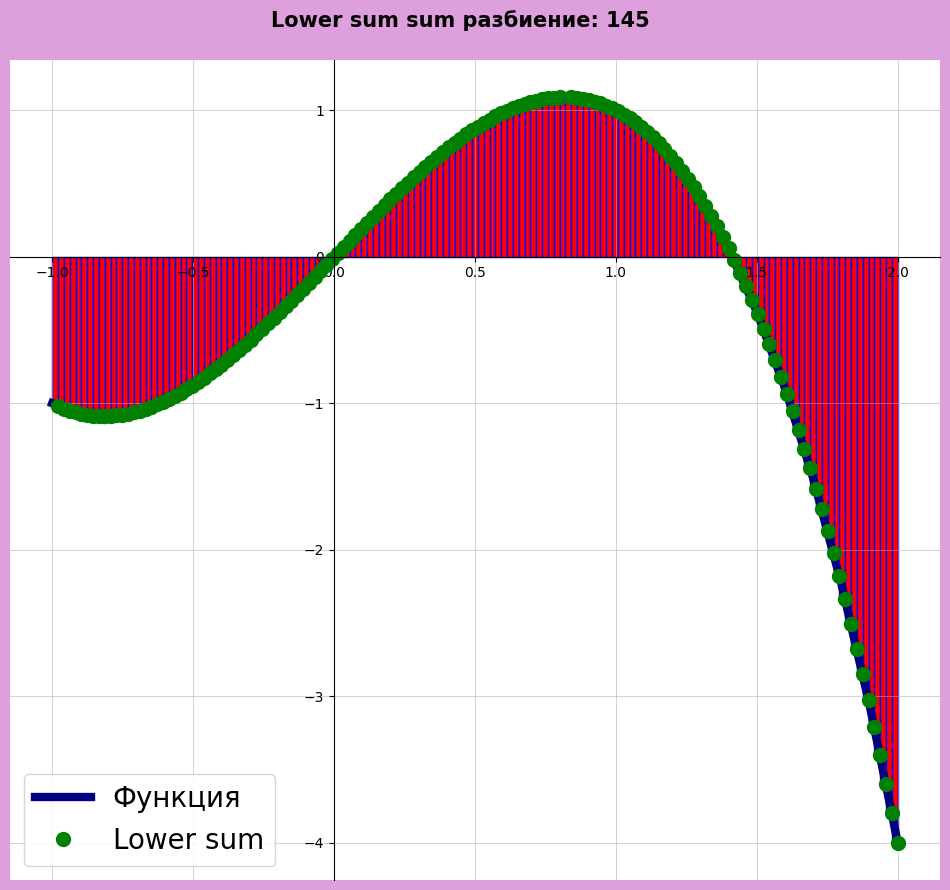

Upper sum:  -0.6743529709400741
Lower sum:  -0.8264027237872119


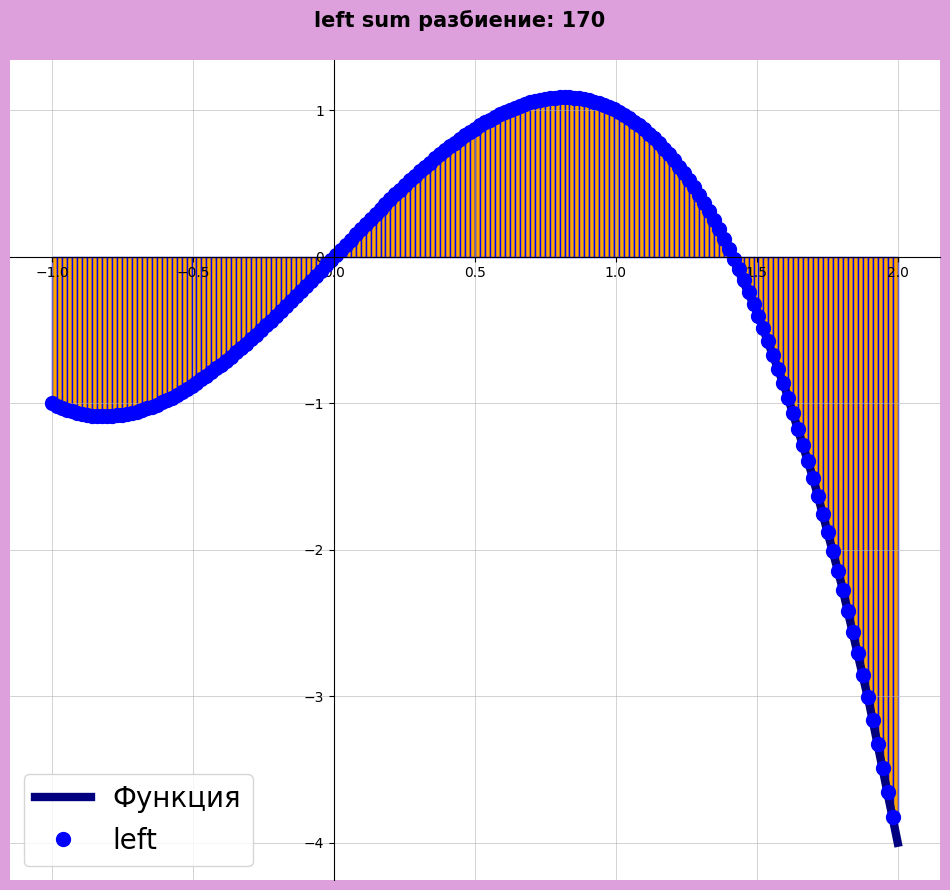

left -0.7237629757785468


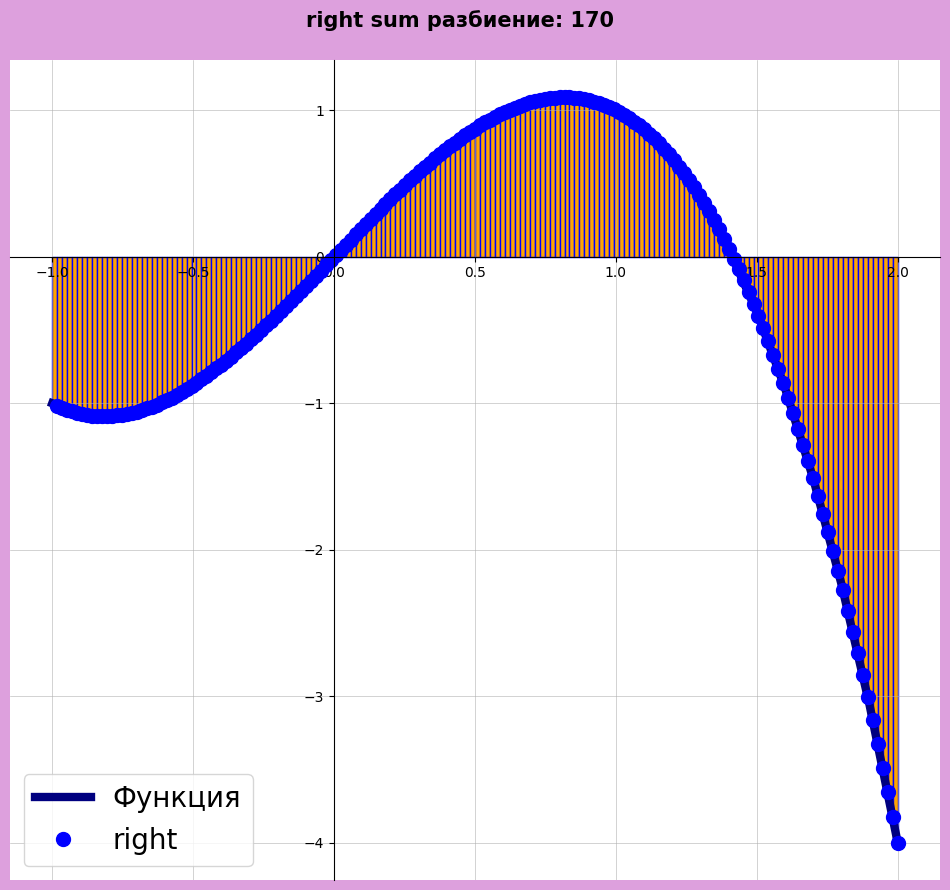

right -0.776704152249135


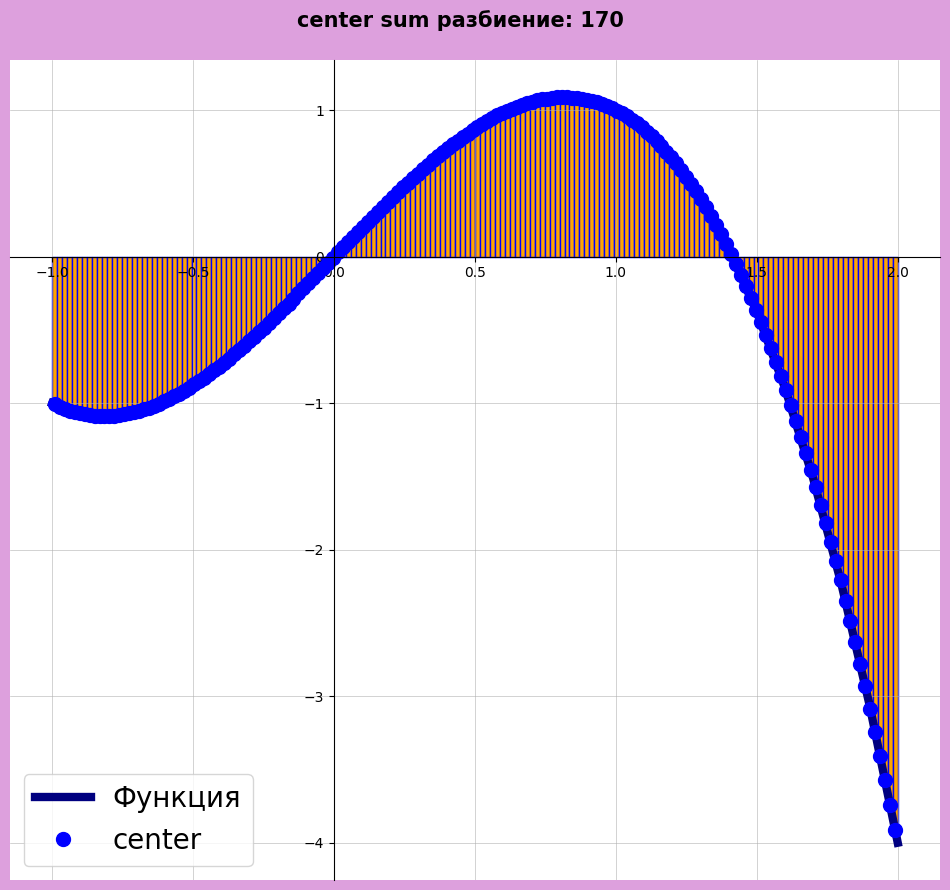

center -0.7498832179930793


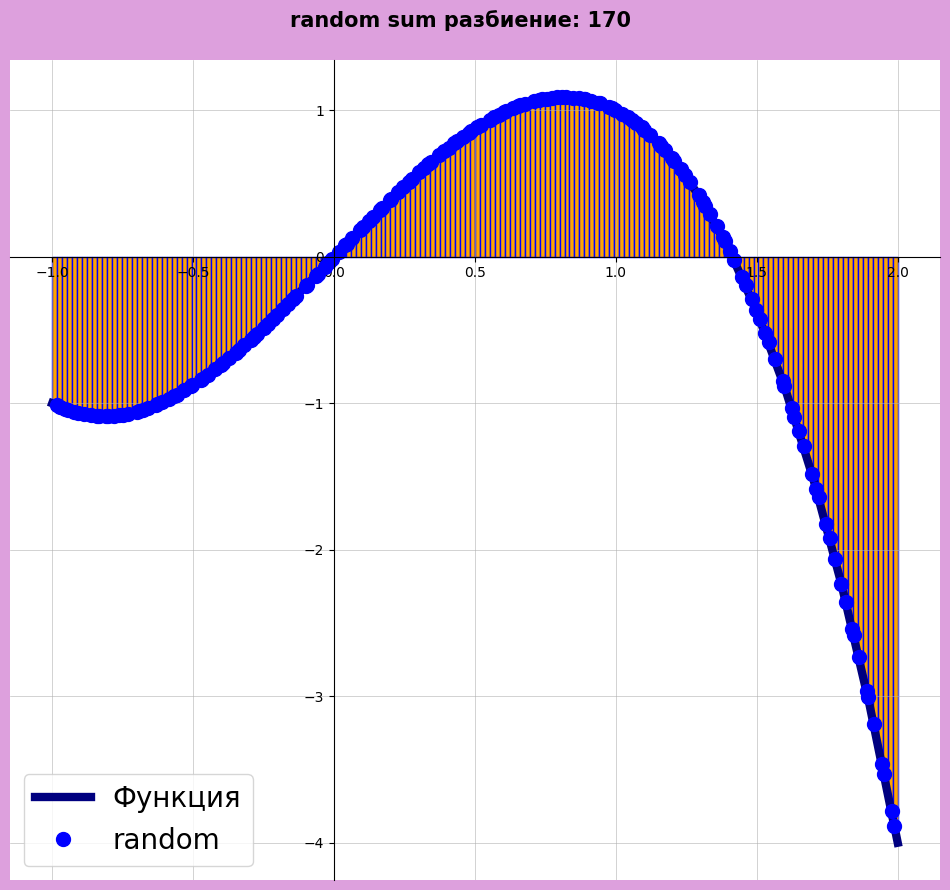

random -0.7433657483772804


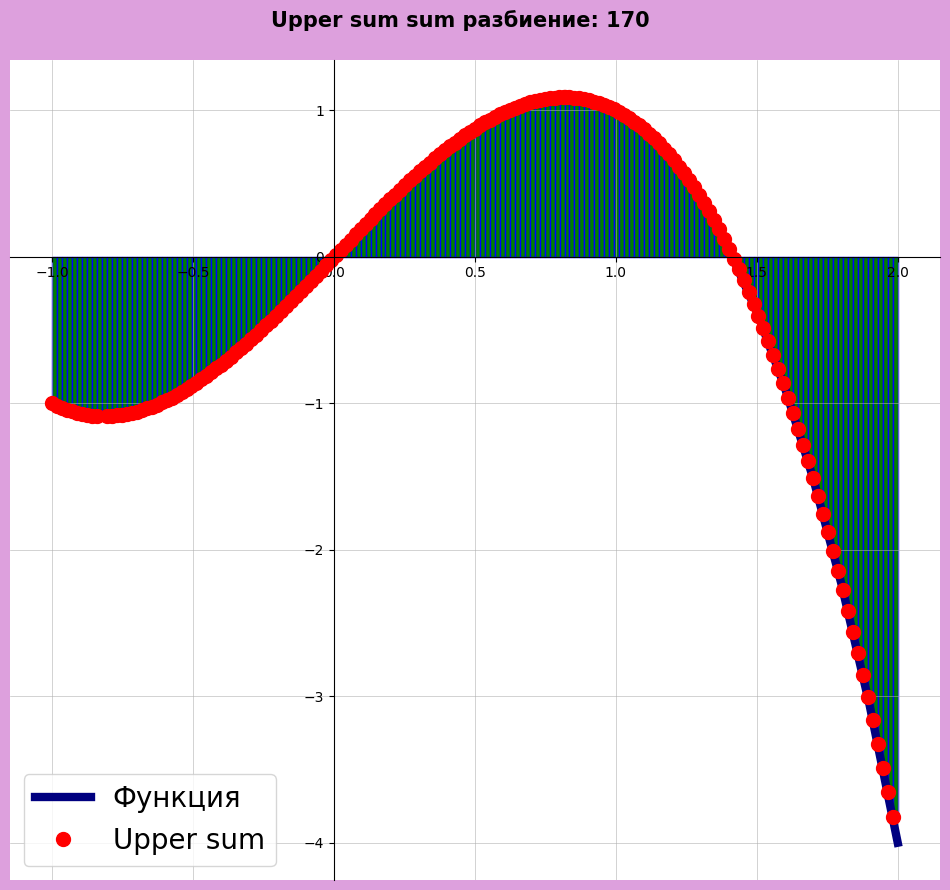

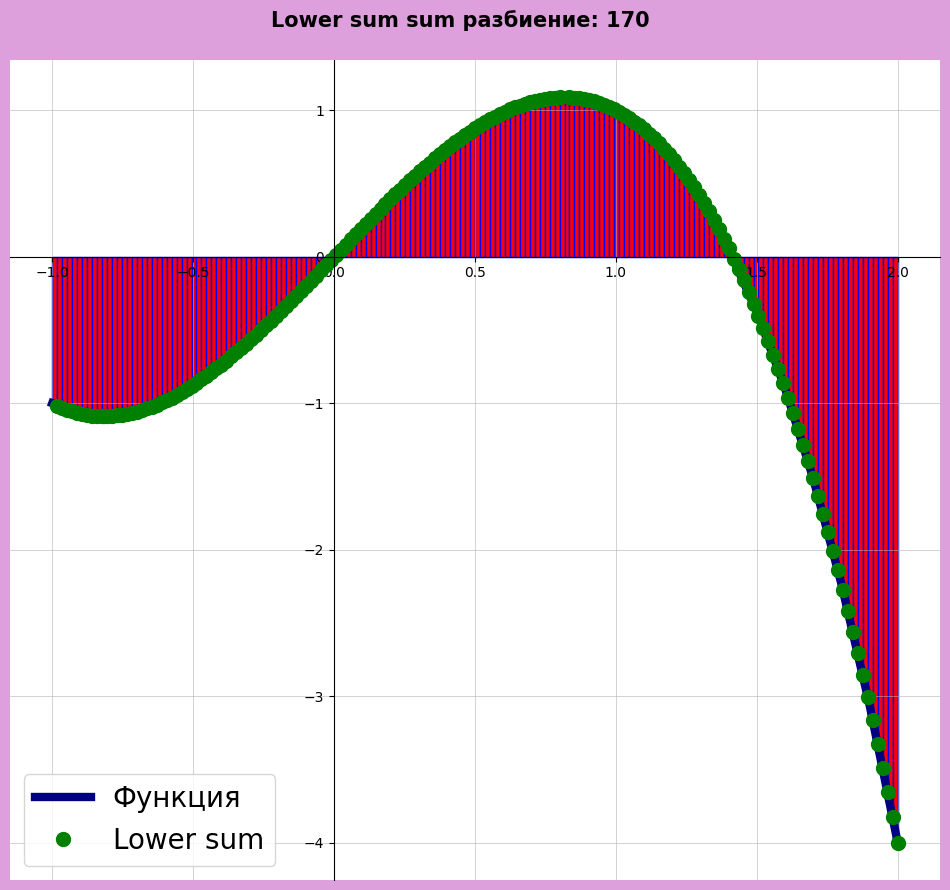

Upper sum:  -0.6855271346922833
Lower sum:  -0.8150972129696125


In [22]:
table = campare_values() # Вызов метода сравнения

In [23]:
print(table)

+-----+--------+--------+--------+--------+--------+--------+--------+
| N   | LEFT   | RIGHT  | CENTER | RANDOM | COR    | COR    | ANAL   |
|     |        |        |        |        | LOW    | UP     | RES    |
|     |        |        |        |        |        |        | -3/4   |
+-----+--------+--------+--------+--------+--------+--------+--------+
| 20  | -0.542 | -0.992 | -0.742 | -0.747 | -1.310 | -0.217 | -0.750 |
+-----+--------+--------+--------+--------+--------+--------+--------+
| 45  | -0.653 | -0.853 | -0.748 | -0.697 | -0.998 | -0.509 | -0.750 |
+-----+--------+--------+--------+--------+--------+--------+--------+
| 70  | -0.687 | -0.816 | -0.749 | -0.760 | -0.907 | -0.595 | -0.750 |
+-----+--------+--------+--------+--------+--------+--------+--------+
| 95  | -0.703 | -0.798 | -0.750 | -0.740 | -0.865 | -0.635 | -0.750 |
+-----+--------+--------+--------+--------+--------+--------+--------+
| 120 | -0.713 | -0.788 | -0.750 | -0.759 | -0.841 | -0.659 | -0.750 |
+-----

Вывод: чем больше разбиение, тем ближе значение площади к реальной точной площади из аналитическоой части, к -0.750

Среднее значение самое точное, так как работает, почти как настоязий интеграл

Рандом на втором месте, так как при сужении границ, случайному числу почти ничего не остается, чем быть как среднее значение

Правый, Левый, Нижняя, Верхняя постепенно идут к цели, так как берут крайние значения, максимумы или минимумы, в итоге далеки от среднего значения

**Покажу, что все функции и правда стремятся к -3/4 (-0.750)**

In [36]:
def draw_middle_values():
    # Средние значения 
    middle_x = [0] * 493
    middle_y = [0] * 493
    pos = 0
    # Вывожу результаты с разбиением 1-752 с шагом 250
    for i in range(70, 5000, 10):
        res = darbu_sums_methods(function, start, end, i, kind, False, False)
        middle_x[pos] = i
        middle_y[pos] = res
        pos += 1
    x = middle_x
    y = middle_y
    
    fig = plt.figure(figsize=(12,5))   # Размер графика
    # Цвет окантовки
    fig.patch.set_facecolor('orange')

    # Заголовок
    ax = fig.add_subplot()
    fig.subplots_adjust(top=0.93)
    fig.suptitle(f'Значения {kind}', fontsize=15, fontweight='bold')

    # Размер координат осей абсцисс и ординат
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

    # Разметка на графике
    plt.grid(axis = 'both', linewidth = 0.4)

    # Выводим график функции
    plt.plot(x, y, color='darkblue', linewidth=6, label='Значения')

    # Выведем Легенду
    plt.legend(loc=1, prop={'size': 20})

    # Вывод полученного графика
    plt.show()

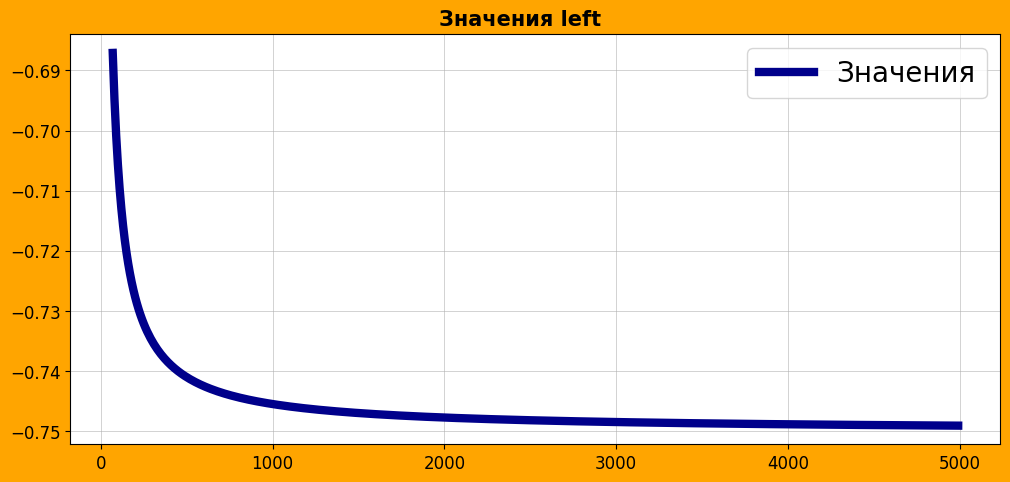

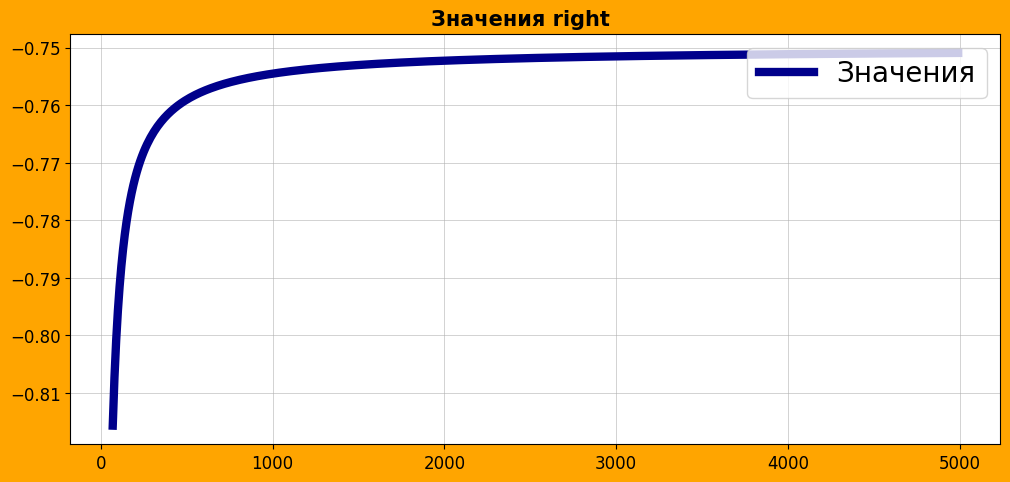

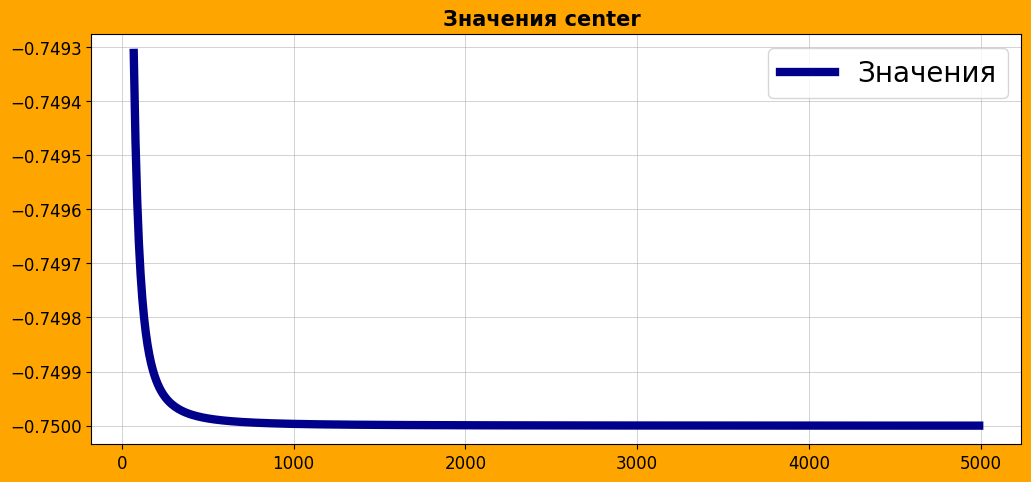

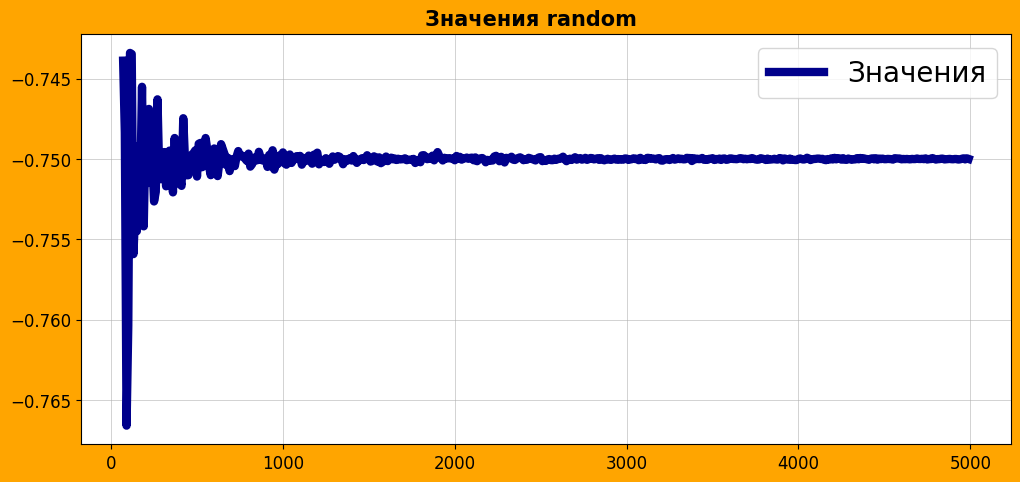

In [37]:
kind = 'left'
draw_middle_values()
kind = 'right'
draw_middle_values()
kind = 'center'
draw_middle_values()
kind = 'random'
draw_middle_values()